# Capstone Project:  Identify key drivers of early student attrition from        Clearwater State University data 


Problem statement : 
Identify key drivers of early student attrition from Clearwater State University data on student demographic profile, course preferences, performance record, grades, financial background, financial aid and other application information
Build a predictive model to identify students with higher early attrition risk
Recommendation based on the analysis

Data : 
Clearwater State University offers a wide variety of degree programs, from online degrees to a doctorate in education.
Programs are offered in the streams of the arts, education, business & nursing.
  
Objective :Some key strategic goals of the University are:
Increase enrolment of students
Improve retention, progression and graduation rates
Recruit better academically qualified undergraduate and graduate students
Increase external funding and recognition

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)

In [2]:
df1=pd.read_excel("StudentApplications&Performance.xlsx",na_values=[""," ","NA","N/A",])

In [3]:
pd.set_option('display.max_columns', None)
df1.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,1150.0,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,200802,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,ITDS 2749,A,NaN,NaN,NaN,NaN,On Campus,0,150.0,4.00,SCHOOL 50,NaN,No Information,NaN,No Information,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,1190.0,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A,200902,ECON 2105,A,ENGL 1102,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.0,2.89,SCHOOL 389,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,1030.0,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN,201102,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,150.0,3.39,SCHOOL 82,2.0,High School,4.0,Other/Unknown,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,1220.0,200708,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,MUSC 1100,A,NaN,NaN,NaN,NaN,On Campus,1,150.0,2.93,SCHOOL 180,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,1190.0,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN,200902,COMM 1110,A,ENGL 1101,A,HIST 2111,A,PSYC 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,69.0,3.86,SCHOOL 2,3.0,College/Beyond,2.0,High School,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [4]:
df1.shape

(3400, 56)

In [5]:
### To Create the Simple report quickly
profile = ProfileReport(df1, title='Pandas Profiling Report', explorative=True)

In [6]:
##profile.to_widgets()

profile.to_file("output.html")

In [7]:

df2=df1.copy()

# Exploratory Data Analysis 

In [8]:
df2.isnull().mean()*100

STUDENT IDENTIFIER           0.000000
STDNT_AGE                    0.000000
STDNT_GENDER                 0.000000
STDNT_BACKGROUND             0.000000
IN_STATE_FLAG                0.000000
INTERNATIONAL_STS            0.000000
STDNT_MAJOR                  0.000000
STDNT_MINOR                  0.000000
STDNT_TEST_ENTRANCE1        67.470588
STDNT_TEST_ENTRANCE2        26.705882
STDNT_TEST_ENTRANCE_COMB    15.235294
FIRST_TERM                   0.000000
CORE_COURSE_NAME_1_F         0.000000
CORE_COURSE_GRADE_1_F        0.000000
CORE_COURSE_NAME_2_F         2.911765
CORE_COURSE_GRADE_2_F        2.911765
CORE_COURSE_NAME_3_F        16.617647
CORE_COURSE_GRADE_3_F       16.617647
CORE_COURSE_NAME_4_F        46.970588
CORE_COURSE_GRADE_4_F       46.970588
CORE_COURSE_NAME_5_F        81.029412
CORE_COURSE_GRADE_5_F       81.029412
CORE_COURSE_NAME_6_F        96.235294
CORE_COURSE_GRADE_6_F       96.235294
SECOND_TERM                  0.000000
CORE_COURSE_NAME_1_S         4.617647
CORE_COURSE_

In [9]:
# from the Pandas profilling we can conclude the following about each feature
#STUDENT IDENTIFIER   0 is a unique ID column with Distinct count	3400 , so can be dropped 

#STDNT_AGE            0 NO nulls and histogram isint skewd, still need to check for outliers if any using boxplot and chebishevs rule

#STDNT_GENDER         0 No nulls , Distinct count	2,ratio of 63%:37% 
#STDNT_BACKGROUND     0 no nulls , Distinct count	8 ,ratio of 61.2%:27.9%:4.1%	:3.1%:2.8%:0.6%	:0.2%:0.1% , all others can be bucketed to others based on frequency 
#IN_STATE_FLAG        0 no nulls,Distinct count	2 ,ratio of 90.1%:9.9% , need to check
#INTERNATIONAL_STS    0 no nulls ,Distinct count	2 ,ratio of 99.2%:0.8% which can be dropped , as it wont prove to be a good predictor
#STDNT_MAJOR          0 no nulls, Distinct count	54 ,HIGH CARDINALITY ,need to be buckkerted based on frequency
#STDNT_MINOR          0 no nulls, Distinct count	37 ,  ratio 92.9%:others , need to check if need to include or buckted

#STDNT_TEST_ENTRANCE1 2294 67.5% missing ,highly corrilated to STDNT_TEST_ENTRANCE_COMB , and as given in data dictinary its also same info in STDNT_TEST_ENTRANCE_COMB , so can be dropped 
#STDNT_TEST_ENTRANCE2 908 26.7% missing ,and as given in data dictinary its also same info in STDNT_TEST_ENTRANCE_COMB , so can be dropped 
#STDNT_TEST_ENTRANCE_COMB  518 15.2% missing , can be impputed with median=990 and also check for outliers histogram is skewed

#FIRST_TERM            0 date variable given as numeric, highly corrilated to second_term,Distinct count	6 , can be dropped
#CORE_COURSE_NAME_1_F  0 NO NULLS , HIGH CARDINALITY ,Distinct count	69 ,need to bucket to be used based on frequency
#CORE_COURSE_GRADE_1_F 0 NO NULLS ,Ordinal Variable ,Distinct count	7, can be  coverted to numeric

#CORE_COURSE_NAME_2_F  99 2.9% missing which can be put to other catogory ,HIGH CARDINALITY,Distinct count	74 ,Bucket on frequency
#CORE_COURSE_GRADE_2_F 99 2.9% Ordinal Variable ,Distinct count	7, can be  coverted to numeric , nulls to other  catogory

#CORE_COURSE_NAME_3_F  565 16.6% nulls to other  catogory,HIGH CARDINALITY,Distinct count	74,need to bucket to be used based on frequency
#CORE_COURSE_GRADE_3_F 565 16.6% nulls to other  catogory ,Ordinal Variable ,Distinct count	6, can be  coverted to numeric

#CORE_COURSE_NAME_4_F        1597  check nulls and check the high cardinality
#CORE_COURSE_GRADE_4_F       1597  check nulls and covert to numerical as its ordinal

#CORE_COURSE_NAME_5_F        2755 check nulls and check the high cardinality
#CORE_COURSE_GRADE_5_F       2755 check nulls and covert to numerical as its ordinal

#CORE_COURSE_NAME_6_F        3272 check nulls and check the high cardinality
#CORE_COURSE_GRADE_6_F       3272 check nulls and covert to numerical as its ordinal

#SECOND_TERM          0 date variable given as numeric, Distinct count	6 , can be dropped
#CORE_COURSE_NAME_1_S         157 check nulls and check the high cardinality
#CORE_COURSE_GRADE_1_S        232 check nulls and covert to numerical as its ordinal
#CORE_COURSE_NAME_2_S         439 check nulls and check the high cardinality
#CORE_COURSE_GRADE_2_S        439 check nulls and covert to numerical as its ordinal
#CORE_COURSE_NAME_3_S        1038 check nulls and check the high cardinality
#CORE_COURSE_GRADE_3_S       1038 check nulls and covert to numerical as its ordinal
#CORE_COURSE_NAME_4_S        2045 check nulls and check the high cardinality
#CORE_COURSE_GRADE_4_S       2045 check nulls and covert to numerical as its ordinal
#CORE_COURSE_NAME_5_S        2950 check nulls and check the high cardinality
#CORE_COURSE_GRADE_5_S       2950 check nulls and covert to numerical as its ordinal
#CORE_COURSE_NAME_6_S        3319  check nulls and check the high cardinality
#CORE_COURSE_GRADE_6_S       3319 check nulls and covert to numerical as its ordinal

#HOUSING_STS                    0  check for outliers if any

#RETURNED_2ND_YR      0  Target variable , imbalanced dataset, ratio of 1:0 as 78.7%:21.3% 

#DISTANCE_FROM_HOME            25  check the high zeroes and outlieres if any
#HIGH_SCHL_GPA                 53  check  outliers if any
#HIGH_SCHL_NAME                 1  check nulls and check the high cardinality

#FATHER_HI_EDU_CD             432 can be dropped as FATHER_HI_EDU_DESC gives same info
#FATHER_HI_EDU_DESC             0  Distinct count	5 
#MOTHER_HI_EDU_CD             489 can be dropped as MOTHER_HI_EDU_DESC gives same info 
#MOTHER_HI_EDU_DESC             0  Distinct count	5
#DEGREE_GROUP_CD                0 can be dropped as DEGREE_GROUP_DESC gives same info 
#DEGREE_GROUP_DESC              0 Distinct count	3

#FIRST_TERM_ATTEMPT_HRS         0 no nulls ,check for outliers 
#FIRST_TERM_EARNED_HRS          0 no nulls ,check for outliers
#SECOND_TERM_ATTEMPT_HRS      206 Nulls need to be checked
#SECOND_TERM_EARNED_HRS       209 Nulls need to be checked

#GROSS_FIN_NEED                 0  check the high zeroes and outliers if any
#COST_OF_ATTEND                 0  check the high zeroes and outliers if any
#EST_FAM_CONTRIBUTION           0  check the high zeroes and outliers if any
#UNMET_NEED                     0  check the high zeroes and outliers if any

# Feature Engineering 

 dropping non significant column based on 50% or more nulls values and columns which gives same info
STUDENT IDENTIFIER
INTERNATIONAL_STS
STDNT_TEST_ENTRANCE1        67.470588
STDNT_TEST_ENTRANCE2        26.705882
FIRST_TERM                   0.000000
CORE_COURSE_NAME_4_F        46.970588
CORE_COURSE_GRADE_4_F       46.970588
CORE_COURSE_NAME_5_F        81.029412
CORE_COURSE_GRADE_5_F       81.029412
CORE_COURSE_NAME_6_F        96.235294
CORE_COURSE_GRADE_6_F       96.235294
SECOND_TERM                  0.000000
CORE_COURSE_NAME_4_S        60.147059
CORE_COURSE_GRADE_4_S       60.147059
CORE_COURSE_NAME_5_S        86.764706
CORE_COURSE_GRADE_5_S       86.764706
CORE_COURSE_NAME_6_S        97.617647
CORE_COURSE_GRADE_6_S       97.617647
FATHER_HI_EDU_CD            12.705882
MOTHER_HI_EDU_CD            14.382353
DEGREE_GROUP_CD              0.000000



In [10]:
df3=df2.drop(["STUDENT IDENTIFIER","INTERNATIONAL_STS","STDNT_TEST_ENTRANCE1","STDNT_TEST_ENTRANCE2","FIRST_TERM","CORE_COURSE_NAME_4_F","CORE_COURSE_GRADE_4_F","CORE_COURSE_NAME_5_F","CORE_COURSE_GRADE_5_F","CORE_COURSE_NAME_6_F","CORE_COURSE_GRADE_6_F","SECOND_TERM","CORE_COURSE_NAME_4_S","CORE_COURSE_GRADE_4_S","CORE_COURSE_NAME_5_S","CORE_COURSE_GRADE_5_S","CORE_COURSE_NAME_6_S","CORE_COURSE_GRADE_6_S","FATHER_HI_EDU_CD","MOTHER_HI_EDU_CD","DEGREE_GROUP_CD"],axis=1)

In [11]:
df3.shape

(3400, 35)

In [12]:
#catogorising numeric andd caogoriccal features to deal with each

In [13]:
numeric_features = df3.select_dtypes(include=[np.number])
categorical_features = df3.select_dtypes(include=[np.object])

print('Numeric Features:\n', numeric_features.columns)
print('Categorical Features:\n', categorical_features.columns)

Numeric Features:
 Index(['STDNT_AGE', 'STDNT_TEST_ENTRANCE_COMB', 'RETURNED_2ND_YR',
       'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'FIRST_TERM_ATTEMPT_HRS',
       'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS',
       'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND',
       'EST_FAM_CONTRIBUTION', 'UNMET_NEED'],
      dtype='object')
Categorical Features:
 Index(['STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'STDNT_MAJOR',
       'STDNT_MINOR', 'CORE_COURSE_NAME_1_F', 'CORE_COURSE_GRADE_1_F',
       'CORE_COURSE_NAME_2_F', 'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'HOUSING_STS', 'HIGH_SCHL_NAME',
       'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_DESC'],
      dtype='object')


In [14]:
# Univariate analysis for numeric and catogorical seperatly using histogram and countplots respectively 

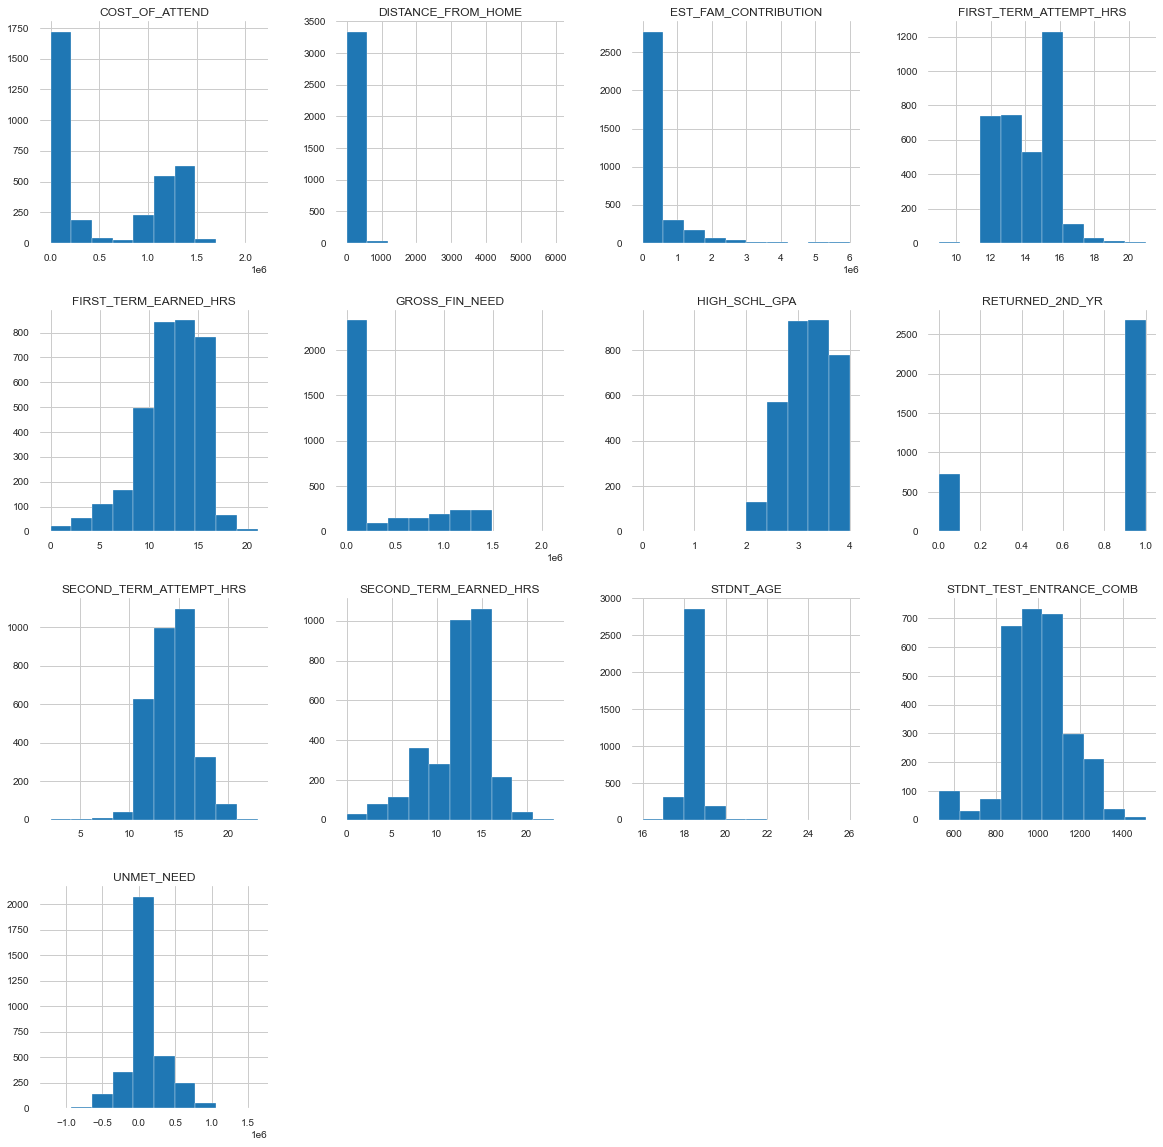

In [15]:
# create a histogram plot of each Numerical variable
ax = df3.hist(figsize=(20,20))
plt.show()

In [16]:
df3.select_dtypes(include=[np.number]).isnull().sum()

STDNT_AGE                     0
STDNT_TEST_ENTRANCE_COMB    518
RETURNED_2ND_YR               0
DISTANCE_FROM_HOME           25
HIGH_SCHL_GPA                53
FIRST_TERM_ATTEMPT_HRS        0
FIRST_TERM_EARNED_HRS         0
SECOND_TERM_ATTEMPT_HRS     206
SECOND_TERM_EARNED_HRS      209
GROSS_FIN_NEED                0
COST_OF_ATTEND                0
EST_FAM_CONTRIBUTION          0
UNMET_NEED                    0
dtype: int64

In [17]:
#conclution about numerical variables from histogram

#'STDNT_AGE'= check for outliers 
#'STDNT_TEST_ENTRANCE_COMB', =check nulls & outliers 
#'RETURNED_2ND_YR',= target  variable , no nulls so need not inspect more 
#'DISTANCE_FROM_HOME', =check nulls and check for the high number of zeroes & outliers 
#'HIGH_SCHL_GPA', =check nulls & outliers 
#'FIRST_TERM_ATTEMPT_HRS',=check for outliers 
#'FIRST_TERM_EARNED_HRS',= check for outliers 
#'SECOND_TERM_ATTEMPT_HRS',=check nulls & outliers 
#'SECOND_TERM_EARNED_HRS',=check nulls  & outliers 
#'GROSS_FIN_NEED', =check for the high number of zeroes and outliers if any
#'COST_OF_ATTEND',=check for the high number of zeroes and outliers if any
#'EST_FAM_CONTRIBUTION', =check for the high number of zeroes and outliers if any
#'UNMET_NEED' = check for the high number of zeroes  and outliers if any


In [18]:
#univariate analysis for catogorical variables using count plots

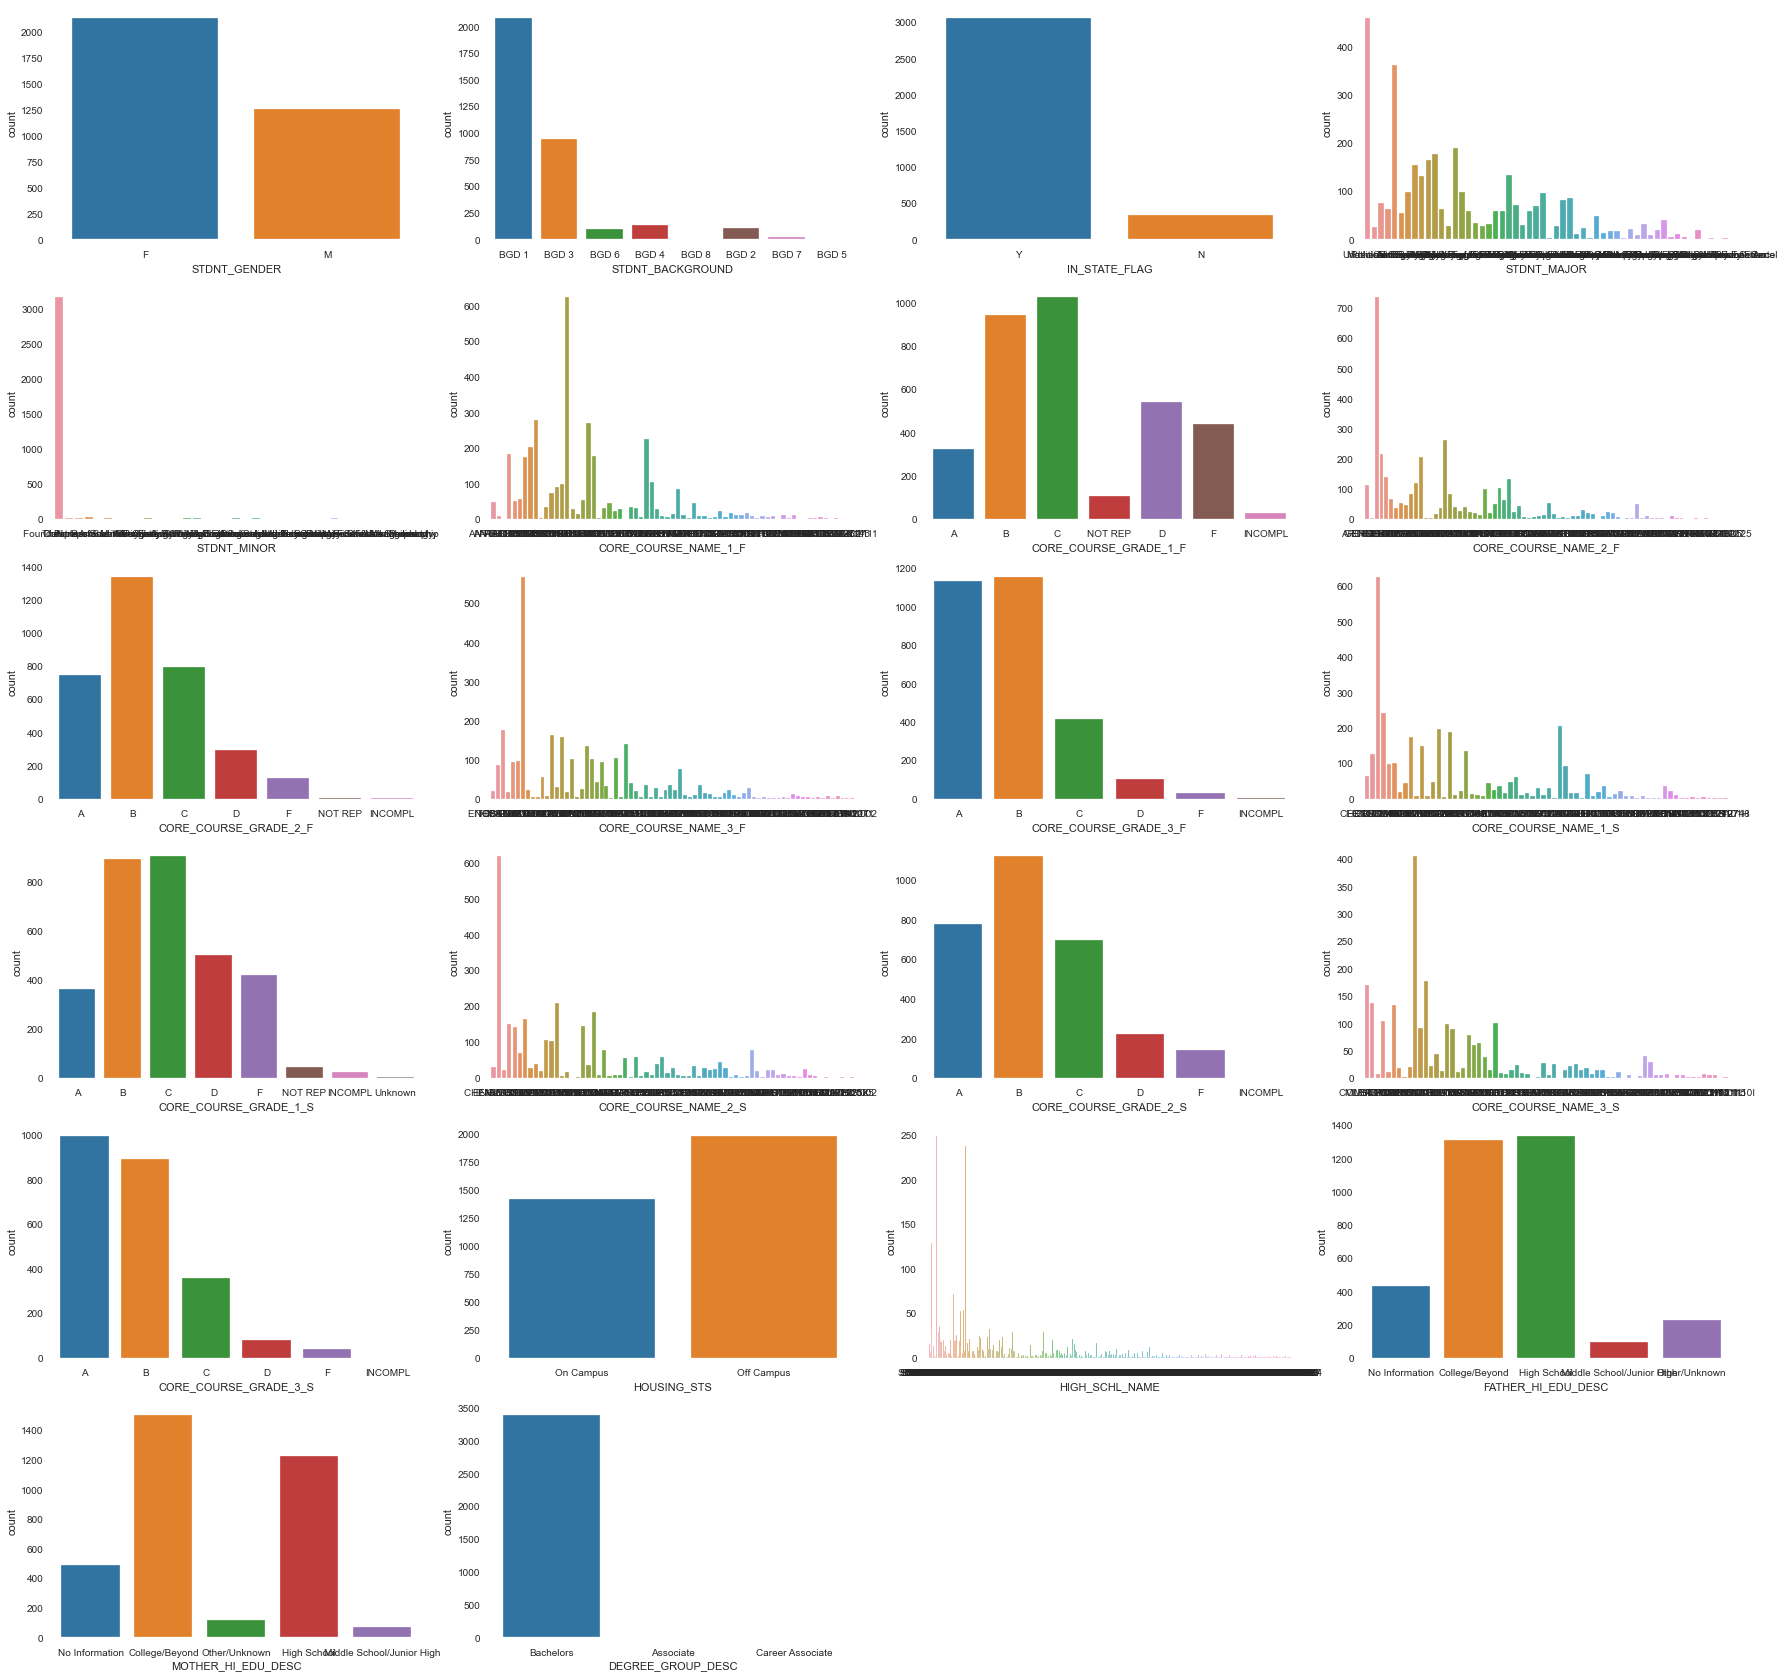

In [19]:
#countplots for all catogorical variables mentioned above 

fig = plt.figure(figsize = (30,30))
     

ax1 = fig.add_subplot(6,4,1)
sns.countplot(data = df3, x = 'STDNT_GENDER', ax=ax1)
ax2 = fig.add_subplot(6,4,2)
sns.countplot(data = df3, x = 'STDNT_BACKGROUND', ax=ax2)
ax3 = fig.add_subplot(6,4,3)
sns.countplot(data = df3, x = 'IN_STATE_FLAG', ax=ax3)
ax4 = fig.add_subplot(6,4,4)
sns.countplot(data = df3, x = 'STDNT_MAJOR', ax=ax4)

ax5 = fig.add_subplot(6,4,5)
sns.countplot(data = df3, x = 'STDNT_MINOR', ax=ax5)
ax6 = fig.add_subplot(6,4,6)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_1_F', ax=ax6)
ax7 = fig.add_subplot(6,4,7)
sns.countplot(data = df3, x = 'CORE_COURSE_GRADE_1_F', ax=ax7)
ax8 = fig.add_subplot(6,4,8)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_2_F', ax=ax8)

ax9 = fig.add_subplot(6,4,9)
sns.countplot(data = df3, x = 'CORE_COURSE_GRADE_2_F', ax=ax9)
ax10 = fig.add_subplot(6,4,10)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_3_F', ax=ax10)
ax11 = fig.add_subplot(6,4,11)
sns.countplot(data = df3, x = 'CORE_COURSE_GRADE_3_F', ax=ax11)
ax12 = fig.add_subplot(6,4,12)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_1_S', ax=ax12)

ax13 = fig.add_subplot(6,4,13)
sns.countplot(data = df3, x = 'CORE_COURSE_GRADE_1_S', ax=ax13)
ax14 = fig.add_subplot(6,4,14)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_2_S', ax=ax14)
ax15 = fig.add_subplot(6,4,15)
sns.countplot(data = df3, x = 'CORE_COURSE_GRADE_2_S', ax=ax15)
ax16 = fig.add_subplot(6,4,16)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_3_S', ax=ax16)

ax17 = fig.add_subplot(6,4,17)
sns.countplot(data = df3, x = 'CORE_COURSE_GRADE_3_S', ax=ax17)
ax18 = fig.add_subplot(6,4,18)
sns.countplot(data = df3, x = 'HOUSING_STS', ax=ax18)
ax19 = fig.add_subplot(6,4,19)
sns.countplot(data = df3, x = 'HIGH_SCHL_NAME', ax=ax19)
ax20 = fig.add_subplot(6,4,20)
sns.countplot(data = df3, x = 'FATHER_HI_EDU_DESC', ax=ax20)

ax21 = fig.add_subplot(6,4,21)
sns.countplot(data = df3, x = 'MOTHER_HI_EDU_DESC', ax=ax21)
ax22 = fig.add_subplot(6,4,22)
sns.countplot(data = df3, x = 'DEGREE_GROUP_DESC', ax=ax22)
        


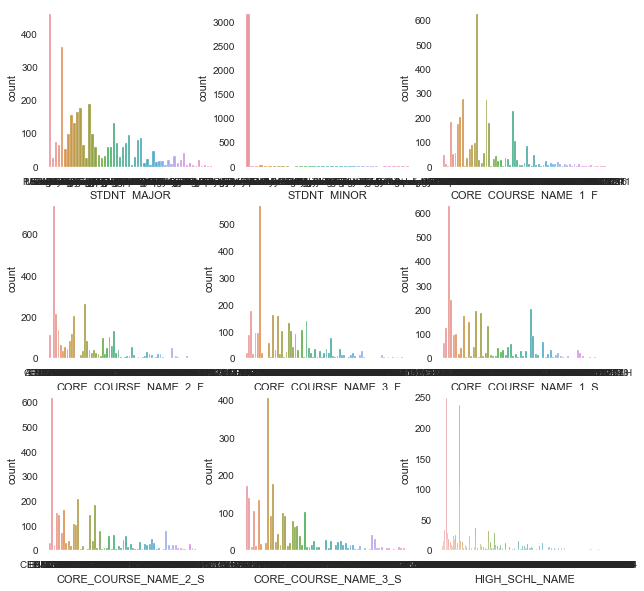

In [20]:
fig = plt.figure(figsize = (10,10))

ax4 = fig.add_subplot(3,3,1)
sns.countplot(data = df3, x = 'STDNT_MAJOR', ax=ax4)

ax5 = fig.add_subplot(3,3,2)
sns.countplot(data = df3, x = 'STDNT_MINOR', ax=ax5)
ax6 = fig.add_subplot(3,3,3)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_1_F', ax=ax6)
ax8 = fig.add_subplot(3,3,4)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_2_F', ax=ax8)
ax10 = fig.add_subplot(3,3,5)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_3_F', ax=ax10)
ax12 = fig.add_subplot(3,3,6)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_1_S', ax=ax12)
ax14 = fig.add_subplot(3,3,7)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_2_S', ax=ax14)
ax16 = fig.add_subplot(3,3,8)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_3_S', ax=ax16)
ax19 = fig.add_subplot(3,3,9)
sns.countplot(data = df3, x = 'HIGH_SCHL_NAME', ax=ax19)

In [21]:
#Conclusion from count plot 

#'STDNT_GENDER' : looks fine and no nulls , keep as it is 
#'STDNT_BACKGROUND': #banground other than 1 and 3 can be clubbed together to other catogory only if required 
#'IN_STATE_FLAG': keep and no null  
#'STDNT_MAJOR', =either bucket /delete /research/check value counts 
#'STDNT_MINOR',= bucket and group 
#'CORE_COURSE_NAME_1_F', =either bucket /delete /research/check value counts 
#'CORE_COURSE_GRADE_1_F', =try to convert to numericals 
#'CORE_COURSE_NAME_2_F', =either bucket /delete /research/check value counts and nulls 
#'CORE_COURSE_GRADE_2_F',=try to convert to numericals and nulls 
#'CORE_COURSE_NAME_3_F', =either bucket /delete /research/check value counts and nulls 
#'CORE_COURSE_GRADE_3_F', =try to convert to numericals and nulls 
#'CORE_COURSE_NAME_1_S', =either bucket /delete /research/check value counts and nulls 
#'CORE_COURSE_GRADE_1_S', =try to convert to numericals and nulls 
#'CORE_COURSE_NAME_2_S', =either bucket /delete /research/check value counts and nulls 
#'CORE_COURSE_GRADE_2_S', =try to convert to numericals and nulls 
#'CORE_COURSE_NAME_3_S', =either bucket /delete /research/check value counts and nulls 
#'CORE_COURSE_GRADE_3_S', =try to convert to numericals and nulls 
#'HOUSING_STS', = keep and check nulls 
#'HIGH_SCHL_NAME', = check how to reduce and check nulls 
#'FATHER_HI_EDU_DESC', =keep  
#'MOTHER_HI_EDU_DESC', =keep 
#'DEGREE_GROUP_DESC' = keep as it is, 


In [22]:
# RETURNED_2ND_YR being y and no nulls , we ccan keep it like that
#it is an imbalanced dataset which we can do modelling by balancing and compare if the accuracy improves
df3["RETURNED_2ND_YR"].value_counts()

1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64

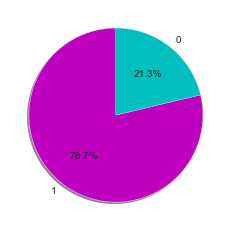

In [23]:
plt.pie(df3["RETURNED_2ND_YR"].value_counts())

#piechart
slices=df3["RETURNED_2ND_YR"].value_counts()
names=["1","0"]
cols=["m","c"]

plt.pie(slices,labels=names,colors=cols,startangle=90,shadow=True,autopct="%1.1f%%")

plt.show()


In [24]:
# Feature Engineering for catogorical variable 
#lets see a function to see Bivariate analysis for each catogorical variable andd then do feature engineerig 

In [25]:
df3.select_dtypes(include=[np.object]).isnull().sum()

STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
STDNT_MAJOR                 0
STDNT_MINOR                 0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F       99
CORE_COURSE_GRADE_2_F      99
CORE_COURSE_NAME_3_F      565
CORE_COURSE_GRADE_3_F     565
CORE_COURSE_NAME_1_S      157
CORE_COURSE_GRADE_1_S     232
CORE_COURSE_NAME_2_S      439
CORE_COURSE_GRADE_2_S     439
CORE_COURSE_NAME_3_S     1038
CORE_COURSE_GRADE_3_S    1038
HOUSING_STS                 0
HIGH_SCHL_NAME              1
FATHER_HI_EDU_DESC          0
MOTHER_HI_EDU_DESC          0
DEGREE_GROUP_DESC           0
dtype: int64

In [26]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     3400
unique       2
top          F
freq      2140
Name: STDNT_GENDER, dtype: object
mode:  0    F
dtype: object
F    2140
M    1260
Name: STDNT_GENDER, dtype: int64


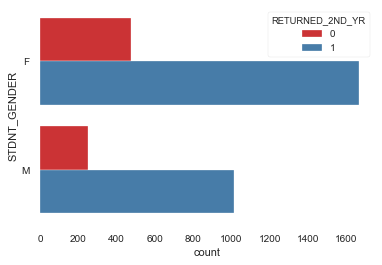

In [27]:
#Bivariate analysis
# Feature Variable: STDNT_GENDER
#no missing values so can be taken as it is 
categorical_summarized(df3, y = 'STDNT_GENDER', hue='RETURNED_2ND_YR', palette='Set1')

count      3400
unique        8
top       BGD 1
freq       2082
Name: STDNT_BACKGROUND, dtype: object
mode:  0    BGD 1
dtype: object
BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64


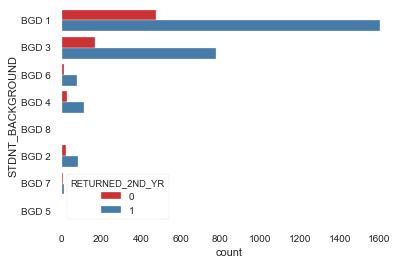

In [28]:
#Bivariate analysis
# Feature Variable: STDNT_BACKGROUND
# BGD 1 and 3 is in high numbers , 
#no hulls and #except for BGD 1 and 3 , alll others can be clubbed together to one group due to low frequency

categorical_summarized(df2, y = 'STDNT_BACKGROUND', hue='RETURNED_2ND_YR', palette='Set1')

In [29]:
STDNT_BACKGROUND = []
for x in df3['STDNT_BACKGROUND']:
    if x=="BGD 1": 
        STDNT_BACKGROUND.append("BGD 1")
    elif x=="BGD 3": 
        STDNT_BACKGROUND.append("BGD 3") 
    else: 
        STDNT_BACKGROUND.append("others")      
df3["STDNT_BACKGROUND_n"] = STDNT_BACKGROUND 

In [30]:
df3["STDNT_BACKGROUND_n"].value_counts()

BGD 1     2082
BGD 3      947
others     371
Name: STDNT_BACKGROUND_n, dtype: int64

In [31]:
df3.drop("STDNT_BACKGROUND",axis=1,inplace=True)

count     3400
unique       2
top          Y
freq      3063
Name: IN_STATE_FLAG, dtype: object
mode:  0    Y
dtype: object
Y    3063
N     337
Name: IN_STATE_FLAG, dtype: int64


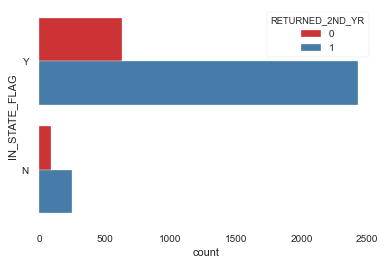

In [32]:
#Bivariate analysis
# Feature Variable: IN_STATE_FLAG
# no nulls and only 2 catogory , can keep as it is 
categorical_summarized(df3, y = 'IN_STATE_FLAG', hue='RETURNED_2ND_YR', palette='Set1')

count           3400
unique            54
top       Undeclared
freq             460
Name: STDNT_MAJOR, dtype: object
mode:  0    Undeclared
dtype: object
Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Chemistry                          64
Political Science                  64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting

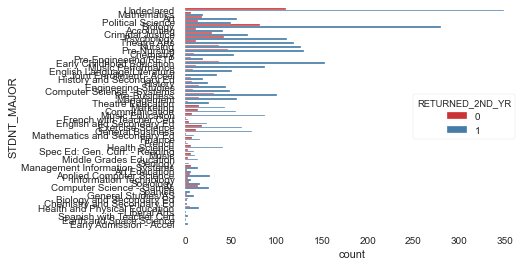

In [33]:
#Bivariate analysis
# Feature Variable: STDNT_MAJOR
#large number of catogories , so need to find a way to bucket before using it 
#no nulls present 
categorical_summarized(df3, y = 'STDNT_MAJOR', hue='RETURNED_2ND_YR', palette='Set1')

In [34]:

STDNT_MAJOR = []
for x in df3['STDNT_MAJOR']:
    if x=="Undeclared": 
        STDNT_MAJOR.append("Undeclared") 
    elif x=="Biology":
        STDNT_MAJOR.append("Biology")
    elif x=="Early Childhood Education":
        STDNT_MAJOR.append("Early Childhood Education")
    elif x=="Pre-Nursing":
        STDNT_MAJOR.append("Pre-Nursing")
    elif x=="Nursing":
        STDNT_MAJOR.append("Nursing")
    else: 
        STDNT_MAJOR.append("others")      


In [35]:
df3["STDNT_MAJOR_n"] = STDNT_MAJOR 

In [36]:
df3["STDNT_MAJOR_n"].value_counts()

others                       2047
Undeclared                    460
Biology                       362
Early Childhood Education     190
Pre-Nursing                   177
Nursing                       164
Name: STDNT_MAJOR_n, dtype: int64

In [37]:
df3.drop("STDNT_MAJOR",axis=1,inplace=True)

count     3400
unique      37
top          N
freq      3160
Name: STDNT_MINOR, dtype: object
mode:  0    N
dtype: object
N                                3160
Spanish                            26
Music                              19
Psychology                         19
Foundations of Business            15
Communication                      14
History                            13
Theatre Arts                       12
Criminal Justice                   12
Computer Science - Systems         10
Early Childhood Education           9
Mathematics                         7
Professional Writing                6
Art History                         6
Marketing                           6
Sociology                           5
English Language/Literature         5
Art                                 5
Chemistry                           4
Biology                             4
Accounting                          4
French                              4
Political Science                   4
Econo

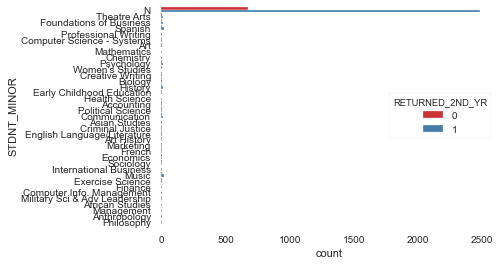

In [38]:
#Bivariate analysis
# Feature Variable: STDNT_MINOR
#need to bucket N and others group
categorical_summarized(df3, y = 'STDNT_MINOR', hue='RETURNED_2ND_YR', palette='Set1')

In [39]:
#90% and above falls under n catogory
#so rest can be bucketed to others catogory to reduce the no. of catogories 
# No nulls present 
STDNT_MINOR = []
for x in df3['STDNT_MINOR']:
    if x=="N": 
        STDNT_MINOR.append("N") 
    else: 
        STDNT_MINOR.append("others")      
df3["STDNT_MINOR_n"] = STDNT_MINOR 

In [40]:
df3["STDNT_MINOR_n"].value_counts()
# delete the original columns STDNT_MINOR
#3160/3400=92.9411 percentage its the same value n, so this column is not fit to predict y ,
#still we can check for feature importance and then drop

N         3160
others     240
Name: STDNT_MINOR_n, dtype: int64

In [41]:
df3.drop("STDNT_MINOR",axis=1,inplace=True)

count           3400
unique             2
top       Off Campus
freq            1981
Name: HOUSING_STS, dtype: object
mode:  0    Off Campus
dtype: object
Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64


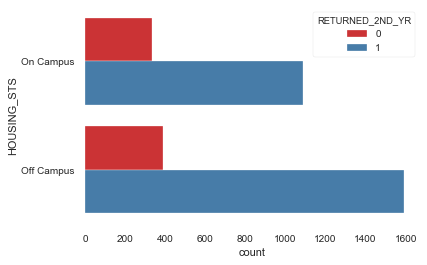

In [42]:
#Bivariate analysis
# Feature Variable: HOUSING_STS
# no nulls and very few catogories so can keep it as it is 
categorical_summarized(df3, y = 'HOUSING_STS', hue='RETURNED_2ND_YR', palette='Set1')

count          3399
unique          439
top       SCHOOL 11
freq            249
Name: HIGH_SCHL_NAME, dtype: object
mode:  0    SCHOOL 11
dtype: object
SCHOOL 11     249
SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
             ... 
SCHOOL 383      1
SCHOOL 195      1
SCHOOL 386      1
SCHOOL 39       1
SCHOOL 68       1
Name: HIGH_SCHL_NAME, Length: 439, dtype: int64


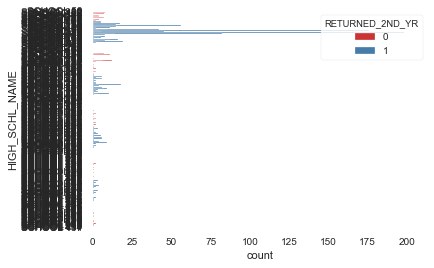

In [43]:
#Bivariate analysis
# Feature Variable: HIGH_SCHL_NAME
# one nulls which we can fill with mode which is SCHOOL 11
#after which can bucket low frequency ones on other catogory 
categorical_summarized(df3, y = 'HIGH_SCHL_NAME', hue='RETURNED_2ND_YR', palette='Set1')

In [44]:
df3["HIGH_SCHL_NAME"].fillna("SCHOOL 11",inplace=True)
df3["HIGH_SCHL_NAME"].isnull().sum()



0

In [45]:
HIGH_SCHL_NAME = []
for x in df3['HIGH_SCHL_NAME']:
    if x=="SCHOOL 11": 
        HIGH_SCHL_NAME.append("SCHOOL 11") 
    elif x=="SCHOOL 130":
        HIGH_SCHL_NAME.append("SCHOOL 130")
    elif x=="SCHOOL 10":
        HIGH_SCHL_NAME.append("SCHOOL 10")
    elif x=="SCHOOL 1":
        HIGH_SCHL_NAME.append("SCHOOL 1")
    elif x=="SCHOOL 2":
        HIGH_SCHL_NAME.append("SCHOOL 2")
    else: 
        HIGH_SCHL_NAME.append("others")      

In [46]:
df3['HIGH_SCHL_NAME_n']=HIGH_SCHL_NAME

In [47]:
df3.drop("HIGH_SCHL_NAME",axis=1,inplace=True)

count            3400
unique              5
top       High School
freq             1336
Name: FATHER_HI_EDU_DESC, dtype: object
mode:  0    High School
dtype: object
High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64


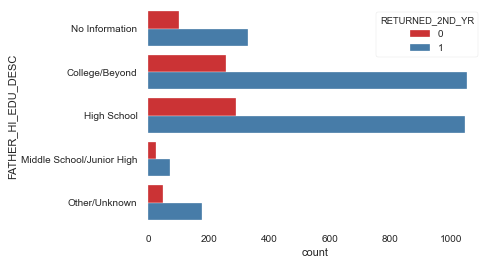

In [48]:
#Bivariate analysis
# Feature Variable: FATHER_HI_EDU_DESC
#no nulls and very few catogories , so no need for any changes
categorical_summarized(df3, y = 'FATHER_HI_EDU_DESC', hue='RETURNED_2ND_YR', palette='Set1')

count               3400
unique                 5
top       College/Beyond
freq                1500
Name: MOTHER_HI_EDU_DESC, dtype: object
mode:  0    College/Beyond
dtype: object
College/Beyond               1500
High School                  1223
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64


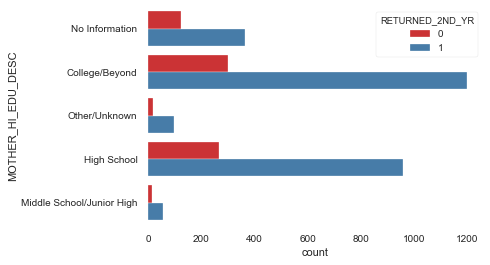

In [49]:
#Bivariate analysis
# Feature Variable: MOTHER_HI_EDU_DESC
#no nulls and very few catogories , so no need for any changes
categorical_summarized(df3, y = 'MOTHER_HI_EDU_DESC', hue='RETURNED_2ND_YR', palette='Set1')

count          3400
unique            3
top       Bachelors
freq           3384
Name: DEGREE_GROUP_DESC, dtype: object
mode:  0    Bachelors
dtype: object
Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64


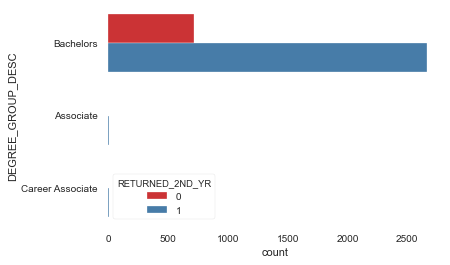

In [50]:
#Bivariate analysis
# Feature Variable: DEGREE_GROUP_DESC
# no nulls and number of catogorie are just 3 , though frequency of all varies a lot ,
#can keep as it is , we can note 99.52% of data account for bachelors, so this column cannot be a good predictor we can drop
categorical_summarized(df3, y = 'DEGREE_GROUP_DESC', hue='RETURNED_2ND_YR', palette='Set1')

In [51]:
##need to deal with remaining catogorical variables 
## we can convert all grades to numerical with a singlee function after dealing with nulls in each



#'CORE_COURSE_GRADE_1_F', =try to convert to numericals 

#'CORE_COURSE_GRADE_2_F',=try to convert to numericals and nulls 

#'CORE_COURSE_GRADE_3_F', =try to convert to numericals and nulls 
 
#'CORE_COURSE_GRADE_1_S', =try to convert to numericals and nulls 

#'CORE_COURSE_GRADE_2_S', =try to convert to numericals and nulls 

#'CORE_COURSE_GRADE_3_S', =try to convert to numericals and nulls

#lets define a function to convert all grades to numericals 
#then replace nulls and then impute respective values 

In [52]:
df3['CORE_COURSE_GRADE_2_F'].fillna("N",inplace=True)

In [53]:
df3['CORE_COURSE_GRADE_3_F'].fillna("N",inplace=True)

In [54]:
df3['CORE_COURSE_GRADE_1_S'].fillna("N",inplace=True)

In [55]:
df3['CORE_COURSE_GRADE_2_S'].fillna("N",inplace=True)

In [56]:
df3['CORE_COURSE_GRADE_3_S'].fillna("N",inplace=True)

In [57]:
#now we can convert all into numericals 
# A=7,B=6,C=5,D=4,F=3,N=2,others=1
def Numeric_converter(x):
    if x=="A":
        return 7
    elif x=="B":
        return 6
    elif x=="C":
        return 5
    elif x=="D":
        return 4
    elif x=="F":
        return 3
    elif x=="N":
        return 2
    else :
        return 1

In [58]:
df3['CORE_COURSE_GRADE_1_F_n']=df3['CORE_COURSE_GRADE_1_F'].map(Numeric_converter)
df3['CORE_COURSE_GRADE_2_F_n']=df3['CORE_COURSE_GRADE_2_F'].map(Numeric_converter)
df3['CORE_COURSE_GRADE_3_F_n']=df3['CORE_COURSE_GRADE_3_F'].map(Numeric_converter)
df3['CORE_COURSE_GRADE_1_S_n']=df3['CORE_COURSE_GRADE_1_S'].map(Numeric_converter)
df3['CORE_COURSE_GRADE_2_S_n']=df3['CORE_COURSE_GRADE_2_S'].map(Numeric_converter)
df3['CORE_COURSE_GRADE_3_S_n']=df3['CORE_COURSE_GRADE_3_S'].map(Numeric_converter)

In [59]:
df3.drop(['CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S','CORE_COURSE_GRADE_3_S'],axis=1,inplace=True)

remaning catogorical variables :

CORE_COURSE_NAME_1_F 0

CORE_COURSE_NAME_2_F 99

CORE_COURSE_NAME_3_F 565

CORE_COURSE_NAME_1_S 157

CORE_COURSE_NAME_2_S 439

CORE_COURSE_NAME_3_S 1038

#since we are bucketing depending on frequency and subjects change with each variable , we need to define a different function for each variable 
we can fill null as missing catogory , so if frequency of nulls is big it will be formed into a seperate group

In [60]:
#CORE_COURSE_NAME_1_F

CORE_COURSE_NAME_1_F = []
for x in df3['CORE_COURSE_NAME_1_F']:
    if x=="ENGL 1101": 
        CORE_COURSE_NAME_1_F.append("ENGL 1101") 
    elif x=="COMM 1110":
        CORE_COURSE_NAME_1_F.append("COMM 1110")
    elif x=="HIST 2111":
        CORE_COURSE_NAME_1_F.append("HIST 2111")
    elif x=="MATH 1111":
        CORE_COURSE_NAME_1_F.append("MATH 1111")
    elif x=="CHEM 1211":
        CORE_COURSE_NAME_1_F.append("CHEM 1211")
    else: 
        CORE_COURSE_NAME_1_F.append("others")      


In [61]:
df3["CORE_COURSE_NAME_1_F_n"]=CORE_COURSE_NAME_1_F

In [62]:
df3.drop("CORE_COURSE_NAME_1_F",axis=1,inplace=True)

In [63]:
#CORE_COURSE_NAME_2_F
print(df3["CORE_COURSE_NAME_2_F"].isnull().sum())

99


In [64]:
df3["CORE_COURSE_NAME_2_F"].fillna("Missing",inplace=True)
print(df3["CORE_COURSE_NAME_2_F"].isnull().sum())

0


In [65]:
df3["CORE_COURSE_NAME_2_F"].value_counts()

ENGL 1101     736
HIST 2111     262
COMM 1110     217
MATH 1111     206
HIST 2112     139
             ... 
THEA 1100I      1
PHYS 2311       1
PHYS 1325       1
MATH 2115       1
ANTH 1107       1
Name: CORE_COURSE_NAME_2_F, Length: 75, dtype: int64

In [66]:
CORE_COURSE_NAME_2_F = []
for x in df3['CORE_COURSE_NAME_2_F']:
    if x=="ENGL 1101": 
        CORE_COURSE_NAME_2_F.append("ENGL 1101") 
    elif x=="HIST 2111":
        CORE_COURSE_NAME_2_F.append("HIST 2111")
    elif x=="COMM 1110":
        CORE_COURSE_NAME_2_F.append("COMM 1110")
    elif x=="MATH 1111":
        CORE_COURSE_NAME_2_F.append("MATH 1111")
    elif x=="HIST 2112":
        CORE_COURSE_NAME_2_F.append("HIST 2112")
    else: 
        CORE_COURSE_NAME_2_F.append("others")      


In [67]:
df3['CORE_COURSE_NAME_2_F_n']=CORE_COURSE_NAME_2_F

In [68]:
df3.drop("CORE_COURSE_NAME_2_F",axis=1,inplace=True)

In [69]:
df3["CORE_COURSE_NAME_3_F"].fillna("Missing",inplace=True)
print(df3["CORE_COURSE_NAME_3_F"].isnull().sum())

0


In [70]:
df3["CORE_COURSE_NAME_3_F"].value_counts()

ENGL 1101     568
Missing       565
HIST 2111     176
MATH 1111     162
COMM 1110     158
             ... 
BIOL 1225K      1
ENGL 2111       1
PHYS 2211       1
MATH 2115       1
ANTH 1107       1
Name: CORE_COURSE_NAME_3_F, Length: 75, dtype: int64

In [71]:
# CORE_COURSE_NAME_3_F

CORE_COURSE_NAME_3_F = []
for x in df3['CORE_COURSE_NAME_3_F']:
    if x=="ENGL 1101": 
        CORE_COURSE_NAME_3_F.append("ENGL 1101") 
    elif x=="Missing":
        CORE_COURSE_NAME_3_F.append("Missing")
    elif x=="HIST 2111":
        CORE_COURSE_NAME_3_F.append("HIST 2111")
    elif x=="MATH 1111":
        CORE_COURSE_NAME_3_F.append("MATH 1111")
    elif x=="COMM 1110":
        CORE_COURSE_NAME_3_F.append("COMM 1110")
    else: 
        CORE_COURSE_NAME_3_F.append("others")      


In [72]:
df3['CORE_COURSE_NAME_3_F_n']=CORE_COURSE_NAME_3_F


In [73]:
df3.drop("CORE_COURSE_NAME_3_F",axis=1,inplace=True)

In [74]:
#CORE_COURSE_NAME_1_S
df3["CORE_COURSE_NAME_1_S"].fillna("Missing",inplace=True)
print(df3["CORE_COURSE_NAME_1_S"].isnull().sum())

0


In [75]:
df3["CORE_COURSE_NAME_1_S"].value_counts(dropna=False)

ENGL 1102     627
COMM 1110     241
POLS 1101     204
HIST 2111     196
MATH 1111     187
             ... 
ITDS 2727       1
GEOL 1121L      1
POLS 1101H      1
MATH 2115       1
FREN 2002       1
Name: CORE_COURSE_NAME_1_S, Length: 67, dtype: int64

In [76]:

CORE_COURSE_NAME_1_S = []
for x in df3['CORE_COURSE_NAME_1_S']:
    if x=="ENGL 1102": 
        CORE_COURSE_NAME_1_S.append("ENGL 1102") 
    elif x=="COMM 1110":
        CORE_COURSE_NAME_1_S.append("COMM 1110")
    elif x=="POLS 1101":
        CORE_COURSE_NAME_1_S.append("POLS 1101")
    elif x=="HIST 2111":
        CORE_COURSE_NAME_1_S.append("HIST 2111")
    elif x=="MATH 1111":
        CORE_COURSE_NAME_1_S.append("MATH 1111")
    else: 
        CORE_COURSE_NAME_1_S.append("others")      


In [77]:
df3['CORE_COURSE_NAME_1_S_n']=CORE_COURSE_NAME_1_S

In [78]:
df3.drop("CORE_COURSE_NAME_1_S",axis=1,inplace=True)

In [79]:
#CORE_COURSE_NAME_2_S
df3["CORE_COURSE_NAME_2_S"].fillna("Missing",inplace=True)
print(df3["CORE_COURSE_NAME_2_S"].isnull().sum())

0


In [80]:
df3["CORE_COURSE_NAME_2_S"].value_counts(dropna=False)

ENGL 1102     617
Missing       439
COMM 1110     208
POLS 1101     183
HIST 2111     164
             ... 
COMM 1110H      1
POLS 1101H      1
MATH 2125       1
MATH 2115       1
GEOL 2225       1
Name: CORE_COURSE_NAME_2_S, Length: 70, dtype: int64

In [81]:

CORE_COURSE_NAME_2_S = []
for x in df3['CORE_COURSE_NAME_2_S']:
    if x=="ENGL 1102": 
        CORE_COURSE_NAME_2_S.append("ENGL 1102") 
    elif x=="Missing":
        CORE_COURSE_NAME_2_S.append("Missing")
    elif x=="COMM 1110":
        CORE_COURSE_NAME_2_S.append("COMM 1110")
    elif x=="POLS 1101":
        CORE_COURSE_NAME_2_S.append("POLS 1101")
    elif x=="HIST 2111":
        CORE_COURSE_NAME_2_S.append("HIST 2111")
    else: 
        CORE_COURSE_NAME_2_S.append("others")      


In [82]:
df3['CORE_COURSE_NAME_2_S_n']=CORE_COURSE_NAME_2_S

In [83]:
df3.drop("CORE_COURSE_NAME_2_S",axis=1,inplace=True)

In [84]:
#CORE_COURSE_NAME_3_S
df3["CORE_COURSE_NAME_3_S"].fillna("Missing",inplace=True)
print(df3["CORE_COURSE_NAME_3_S"].isnull().sum())

0


In [85]:
df3["CORE_COURSE_NAME_3_S"].value_counts(dropna=False)

Missing       1038
ENGL 1102      405
POLS 1101      177
COMM 1110      170
MUSC 1100      138
              ... 
FREN 2002        1
GEOL 1121L       1
ANTH 1107        1
PHYS 1325        1
MATH 2115        1
Name: CORE_COURSE_NAME_3_S, Length: 69, dtype: int64

In [86]:

CORE_COURSE_NAME_3_S = []
for x in df3['CORE_COURSE_NAME_3_S']:
    if x=="Missing": 
        CORE_COURSE_NAME_3_S.append("Missing") 
    elif x=="ENGL 1102":
        CORE_COURSE_NAME_3_S.append("ENGL 1102")
    elif x=="POLS 1101":
        CORE_COURSE_NAME_3_S.append("POLS 1101")
    elif x=="COMM 1110":
        CORE_COURSE_NAME_3_S.append("COMM 1110")
    elif x=="MUSC 1100":
        CORE_COURSE_NAME_3_S.append("MUSC 1100")
    else: 
        CORE_COURSE_NAME_3_S.append("others")      


In [87]:
df3['CORE_COURSE_NAME_3_S_n']=CORE_COURSE_NAME_3_S

In [88]:
df3.drop("CORE_COURSE_NAME_3_S",axis=1,inplace=True)

In [89]:
df3.select_dtypes(include=[np.object]).isnull().sum()

STDNT_GENDER              0
IN_STATE_FLAG             0
HOUSING_STS               0
FATHER_HI_EDU_DESC        0
MOTHER_HI_EDU_DESC        0
DEGREE_GROUP_DESC         0
STDNT_BACKGROUND_n        0
STDNT_MAJOR_n             0
STDNT_MINOR_n             0
HIGH_SCHL_NAME_n          0
CORE_COURSE_NAME_1_F_n    0
CORE_COURSE_NAME_2_F_n    0
CORE_COURSE_NAME_3_F_n    0
CORE_COURSE_NAME_1_S_n    0
CORE_COURSE_NAME_2_S_n    0
CORE_COURSE_NAME_3_S_n    0
dtype: int64

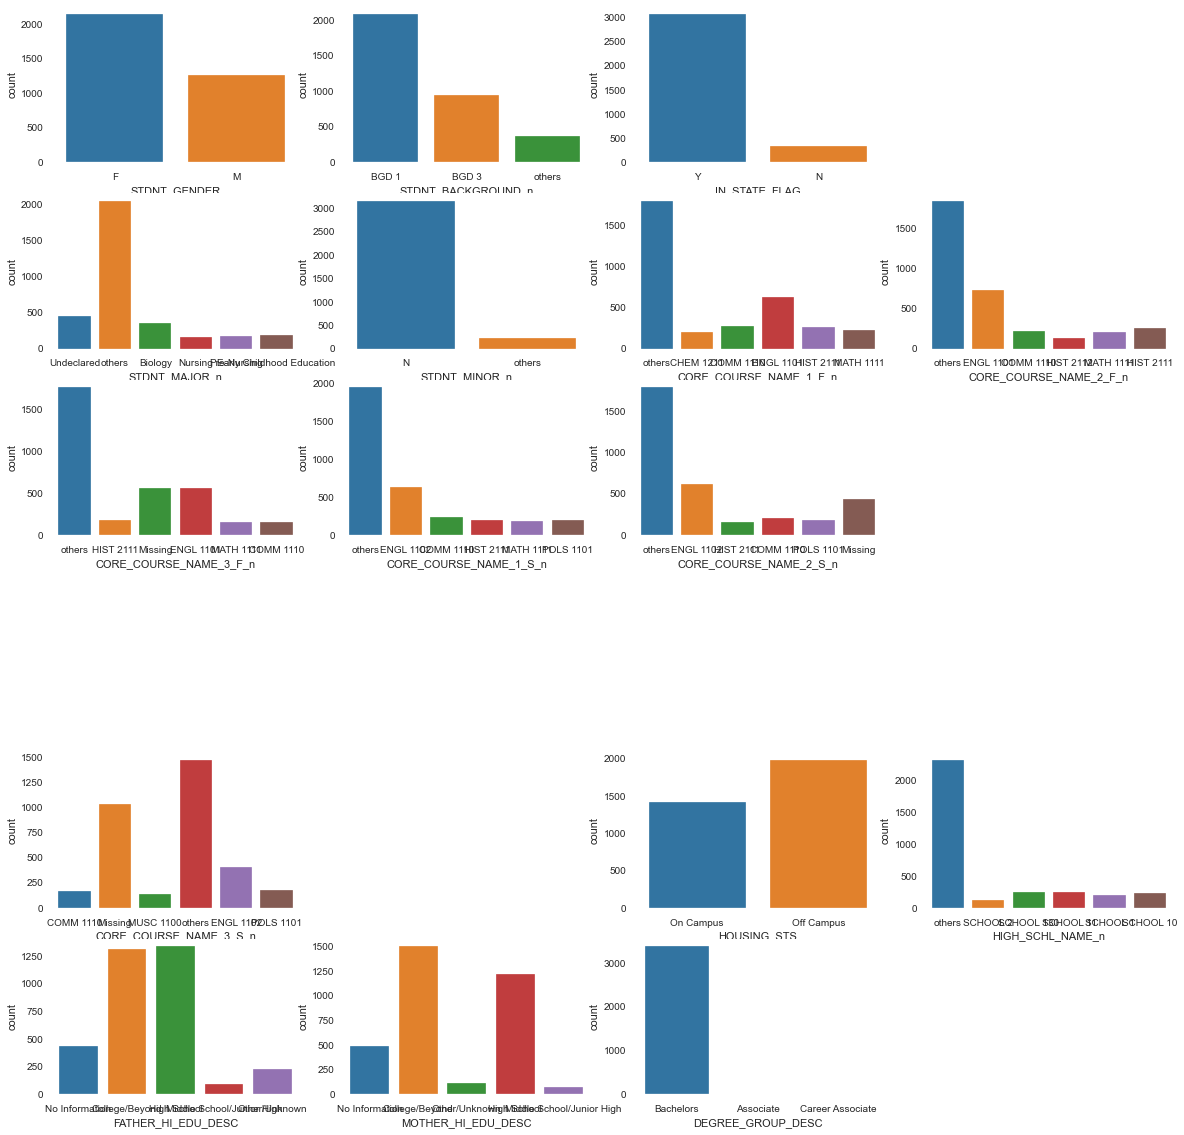

In [90]:
#countplots for all catogorical variables mentioned above 

fig = plt.figure(figsize = (20,20))
     

ax1 = fig.add_subplot(6,4,1)
sns.countplot(data = df3, x = 'STDNT_GENDER', ax=ax1)
ax2 = fig.add_subplot(6,4,2)
sns.countplot(data = df3, x = 'STDNT_BACKGROUND_n', ax=ax2)
ax3 = fig.add_subplot(6,4,3)
sns.countplot(data = df3, x = 'IN_STATE_FLAG', ax=ax3)
#ax4 = fig.add_subplot(6,4,4)
#sns.countplot(data = df2, x = 'INTERNATIONAL_STS', ax=ax4)

ax5 = fig.add_subplot(6,4,5)
sns.countplot(data = df3, x = 'STDNT_MAJOR_n', ax=ax5)
ax6 = fig.add_subplot(6,4,6)
sns.countplot(data = df3, x = 'STDNT_MINOR_n', ax=ax6)
ax7 = fig.add_subplot(6,4,7)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_1_F_n', ax=ax7)
#ax8 = fig.add_subplot(6,4,8)
#sns.countplot(data = df3, x = 'CORE_COURSE_GRADE_1_F_n', ax=ax8)


ax8 = fig.add_subplot(6,4,8)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_2_F_n', ax=ax8)
#ax10 = fig.add_subplot(6,4,10)
#sns.countplot(data = df2, x = 'CORE_COURSE_GRADE_2_F_n', ax=ax10)
ax9 = fig.add_subplot(6,4,9)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_3_F_n', ax=ax9)
#ax12 = fig.add_subplot(6,4,12)
#sns.countplot(data = df2, x = 'CORE_COURSE_GRADE_3_F_n', ax=ax12)


ax10 = fig.add_subplot(6,4,10)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_1_S_n', ax=ax10)
#ax14 = fig.add_subplot(6,4,14)
#sns.countplot(data = df2, x = 'CORE_COURSE_GRADE_1_S_n', ax=ax14)
ax11 = fig.add_subplot(6,4,11)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_2_S_n', ax=ax11)
#ax16 = fig.add_subplot(6,4,16)
#sns.countplot(data = df2, x = 'CORE_COURSE_GRADE_2_S_n', ax=ax16)


ax17 = fig.add_subplot(6,4,17)
sns.countplot(data = df3, x = 'CORE_COURSE_NAME_3_S_n', ax=ax17)
#ax18 = fig.add_subplot(6,4,18)
#sns.countplot(data = df2, x = 'CORE_COURSE_GRADE_3_S_n', ax=ax18)
ax19 = fig.add_subplot(6,4,19)
sns.countplot(data = df3, x = 'HOUSING_STS', ax=ax19)
ax20 = fig.add_subplot(6,4,20)
sns.countplot(data = df3, x = 'HIGH_SCHL_NAME_n', ax=ax20)


ax21 = fig.add_subplot(6,4,21)
sns.countplot(data = df3, x = 'FATHER_HI_EDU_DESC', ax=ax21)
ax22 = fig.add_subplot(6,4,22)
sns.countplot(data = df3, x = 'MOTHER_HI_EDU_DESC', ax=ax22)
ax23 = fig.add_subplot(6,4,23)
sns.countplot(data = df3, x = 'DEGREE_GROUP_DESC', ax=ax23)
        


In [91]:
#Feature Engineering numerical variable 
df3.select_dtypes(include=[np.number]).isnull().sum()

STDNT_AGE                     0
STDNT_TEST_ENTRANCE_COMB    518
RETURNED_2ND_YR               0
DISTANCE_FROM_HOME           25
HIGH_SCHL_GPA                53
FIRST_TERM_ATTEMPT_HRS        0
FIRST_TERM_EARNED_HRS         0
SECOND_TERM_ATTEMPT_HRS     206
SECOND_TERM_EARNED_HRS      209
GROSS_FIN_NEED                0
COST_OF_ATTEND                0
EST_FAM_CONTRIBUTION          0
UNMET_NEED                    0
CORE_COURSE_GRADE_1_F_n       0
CORE_COURSE_GRADE_2_F_n       0
CORE_COURSE_GRADE_3_F_n       0
CORE_COURSE_GRADE_1_S_n       0
CORE_COURSE_GRADE_2_S_n       0
CORE_COURSE_GRADE_3_S_n       0
dtype: int64

In [92]:
# we have to deal with nulls and outliiers in each numeric variable 
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
STDNT_AGE,3400.0,17.994118,0.552052,16.0,18.00,18.0,18.00,26.0
STDNT_TEST_ENTRANCE_COMB,2882.0,997.758501,156.268221,530.0,910.00,990.0,1110.00,1510.0
RETURNED_2ND_YR,3400.0,0.787353,0.409240,0.0,1.00,1.0,1.00,1.0
DISTANCE_FROM_HOME,3375.0,99.825185,235.196984,0.0,69.00,69.0,138.00,5932.0
HIGH_SCHL_GPA,3347.0,3.202738,0.455337,0.0,2.87,3.2,3.56,4.0
FIRST_TERM_ATTEMPT_HRS,3400.0,13.985882,1.554286,9.0,13.00,14.0,15.00,21.0
FIRST_TERM_EARNED_HRS,3400.0,12.205000,2.986294,0.0,11.00,13.0,15.00,21.0
SECOND_TERM_ATTEMPT_HRS,3194.0,14.285848,2.104387,2.0,13.00,14.0,16.00,23.0
SECOND_TERM_EARNED_HRS,3191.0,12.511125,3.470492,0.0,11.00,13.0,15.00,23.0
GROSS_FIN_NEED,3400.0,303402.506471,483625.450816,0.0,0.00,0.0,599580.00,2124900.0


In [93]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
df4=df3.copy()
# we will do the numerical transformation in df4 , so that if we din get a good accuracy we can always come back and start with df3

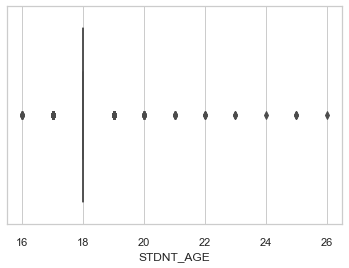

In [95]:
#univariate analysis 
#STDNT_AGE  -no nulls need to check for outlier and do the needfull
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["STDNT_AGE"])
# not a clear indication , let also check whats the 3 std values are 


In [96]:
#lets check the outliiers using chebishev's rule
print(17.994118-3*0.552052)
print(17.994118+3*0.552052)
#lets check all values below 16 and above 19 , which is outlers 

16.337962
19.650274


In [97]:
df4[df4["STDNT_AGE"]<16]##no values 
df4[df4["STDNT_AGE"]>19]
#lets impute all values with 19, which is upper bound as others are outliers 

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
87,20,F,N,690.0,On Campus,1,59.0,3.210,No Information,No Information,Bachelors,14,14,15.0,15.0,0,301080,0,-60000.0,others,others,N,others,7,7,2,7,7,2,ENGL 1101,others,Missing,ENGL 1102,others,Missing
213,20,F,Y,1030.0,Off Campus,1,69.0,3.810,High School,High School,Bachelors,12,12,13.0,13.0,0,0,0,0.0,BGD 1,Undeclared,N,others,6,6,7,7,7,7,others,others,others,others,COMM 1110,others
329,21,F,N,1150.0,Off Campus,1,0.0,3.200,Other/Unknown,High School,Bachelors,15,14,17.0,16.0,154680,1466460,368340,73380.0,BGD 3,Biology,others,others,7,7,7,6,7,7,ENGL 1101,others,others,ENGL 1102,COMM 1110,others
348,23,F,Y,1030.0,Off Campus,1,69.0,3.180,College/Beyond,College/Beyond,Bachelors,13,13,16.0,12.0,0,0,0,0.0,BGD 1,Biology,N,others,7,7,7,6,7,7,others,others,others,POLS 1101,COMM 1110,others
655,25,M,Y,1260.0,Off Campus,1,69.0,NaN,No Information,No Information,Bachelors,13,13,12.0,12.0,0,0,0,0.0,BGD 1,others,N,others,7,7,7,5,7,7,others,ENGL 1101,others,ENGL 1102,others,POLS 1101
668,21,M,N,1070.0,Off Campus,1,0.0,3.000,No Information,No Information,Bachelors,15,14,16.0,16.0,0,0,0,-507300.0,BGD 1,Undeclared,N,others,6,7,7,5,7,2,others,ENGL 1101,others,others,ENGL 1102,Missing
832,20,M,N,NaN,On Campus,1,NaN,4.000,No Information,No Information,Bachelors,14,14,18.0,18.0,0,301080,0,-1212072.0,BGD 1,others,N,others,6,7,7,6,6,2,ENGL 1101,others,others,others,ENGL 1102,Missing
993,23,M,Y,1190.0,Off Campus,1,0.0,2.923,College/Beyond,College/Beyond,Associate,12,12,19.0,15.0,0,0,0,0.0,BGD 1,others,N,others,6,6,6,6,6,6,ENGL 1101,others,others,others,ENGL 1102,others
1004,22,M,N,1030.0,Off Campus,1,0.0,2.000,College/Beyond,College/Beyond,Bachelors,16,15,15.0,15.0,0,0,0,0.0,BGD 1,others,N,others,6,6,7,6,6,6,ENGL 1101,others,others,COMM 1110,ENGL 1102,others
1179,20,M,Y,1070.0,Off Campus,0,69.0,3.500,High School,High School,Bachelors,14,14,13.0,13.0,813780,861060,47280,595860.0,BGD 1,Undeclared,N,SCHOOL 10,5,5,6,6,6,6,ENGL 1101,others,others,others,others,POLS 1101


In [98]:
df4["STDNT_AGE"] = np.where(df4["STDNT_AGE"] >19, 19,df4['STDNT_AGE'])

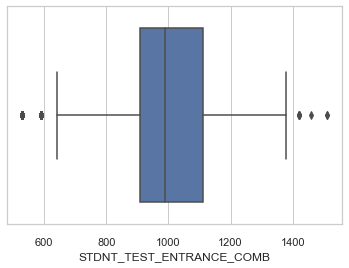

In [99]:
#STDNT_TEST_ENTRANCE_COMB
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["STDNT_TEST_ENTRANCE_COMB"])
# we can see there are outliers far from both high and low bounds , frst we deal with null values and then with outliers 

In [100]:
# we impute nulls with median as it is not affected by outliers 
df4["STDNT_TEST_ENTRANCE_COMB"].fillna(990.0,inplace=True)

In [101]:
df4["STDNT_TEST_ENTRANCE_COMB"].isnull().sum()
# lets check the lower and upper bound according to checbishev rule 
# mean and std are 997.758501	156.268221
print(997.758501-3*156.268221)
print(997.758501+3*156.268221)

528.953838
1466.5631640000001


In [102]:
#lets check outliers which is less than 528 and more than 1466
df4[df4["STDNT_TEST_ENTRANCE_COMB"]<528] # no rows found
df4[df4["STDNT_TEST_ENTRANCE_COMB"]>1466]# only 2 rows with values 1510 which we can impute with 1466

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
1706,18,F,Y,1510.0,Off Campus,1,69.0,3.12,College/Beyond,College/Beyond,Bachelors,16,16,16.0,16.0,0,0,0,0.0,BGD 1,others,N,SCHOOL 130,7,2,2,5,6,6,others,others,Missing,ENGL 1102,COMM 1110,others
2550,18,F,Y,1510.0,On Campus,1,235.0,3.15,High School,Other/Unknown,Bachelors,16,13,16.0,13.0,0,0,0,0.0,BGD 3,others,N,others,4,4,6,3,5,6,others,HIST 2112,others,ENGL 1102,others,others


In [103]:
df4["STDNT_TEST_ENTRANCE_COMB"] = np.where(df4["STDNT_TEST_ENTRANCE_COMB"] >1466, 1466,df4['STDNT_TEST_ENTRANCE_COMB'])

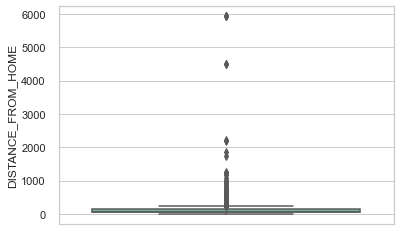

In [104]:
#DISTANCE_FROM_HOME
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["DISTANCE_FROM_HOME"],orient="v", palette="Set2")
#lets impute nulls with median as there is outliers present
#then see the outlers we see in boxplot

In [105]:
df4["DISTANCE_FROM_HOME"].fillna(69.0,inplace=True)

In [106]:
df4["DISTANCE_FROM_HOME"].isnull().sum()
# lets check outliers by upper and lower bounds according to chebishev rule
print(99.825185-3*235.196984)
print(99.825185+3*235.196984)

-605.765767
805.416137


In [107]:
# we see a negative value , which means no outlier in lower bound
#for upper bound we will check the values greater than 805
df4[df4["DISTANCE_FROM_HOME"]<1]
#there are 671 rows  with zero DISTANCE_FROM_HOME which is not possible value , also its 20% data so lets impute with median

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
6,18,F,Y,590.0,Off Campus,1,0.0,3.93,No Information,No Information,Bachelors,16,16,15.0,15.0,0,0,0,0.0,BGD 1,Biology,N,SCHOOL 2,7,7,7,7,7,2,others,others,others,ENGL 1102,others,Missing
7,18,F,Y,740.0,Off Campus,1,0.0,4.00,No Information,No Information,Bachelors,16,16,15.0,15.0,0,0,0,0.0,BGD 1,Biology,N,SCHOOL 130,7,7,7,7,7,2,others,others,others,ENGL 1102,others,Missing
13,17,M,Y,1220.0,Off Campus,1,0.0,4.00,College/Beyond,High School,Bachelors,15,15,16.0,16.0,0,1255740,1344360,-347580.0,BGD 1,others,N,SCHOOL 130,7,7,7,7,7,7,others,ENGL 1101,others,ENGL 1102,others,others
19,18,F,N,990.0,Off Campus,1,0.0,3.71,High School,High School,Bachelors,12,12,13.0,13.0,567000,835680,268680,409500.0,BGD 1,Nursing,N,others,7,7,7,7,7,2,others,others,MATH 1111,others,others,Missing
27,18,F,Y,1110.0,On Campus,1,0.0,3.57,No Information,High School,Bachelors,16,16,16.0,16.0,861720,1176420,314700,405060.0,BGD 1,others,N,others,7,7,7,7,7,7,CHEM 1211,others,ENGL 1101,ENGL 1102,others,POLS 1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,18,F,Y,990.0,Off Campus,1,0.0,2.13,High School,High School,Bachelors,12,4,NaN,NaN,0,336960,0,-192120.0,BGD 1,Undeclared,N,SCHOOL 1,3,3,5,2,2,2,others,MATH 1111,others,others,Missing,Missing
3388,18,M,Y,590.0,Off Campus,0,0.0,2.94,College/Beyond,High School,Bachelors,16,10,NaN,NaN,0,869760,2632860,0.0,BGD 1,Biology,N,others,3,3,4,2,2,2,HIST 2111,MATH 1111,ENGL 1101,others,Missing,Missing
3391,18,F,N,990.0,Off Campus,0,0.0,2.56,No Information,No Information,Bachelors,17,6,NaN,NaN,0,0,0,0.0,BGD 1,others,N,others,3,3,5,2,2,2,others,others,ENGL 1101,others,Missing,Missing
3392,19,M,N,1070.0,Off Campus,0,0.0,NaN,High School,High School,Bachelors,15,3,NaN,NaN,0,0,467520,0.0,BGD 1,Undeclared,N,others,1,3,3,2,2,2,others,others,others,POLS 1101,Missing,Missing


In [108]:
df4[df4["DISTANCE_FROM_HOME"]>805]

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
10,18,M,N,1220.0,Off Campus,1,4501.0,3.34,College/Beyond,College/Beyond,Bachelors,15,15,18.0,15.0,203040,1264860,1061820,203040.0,BGD 1,others,N,others,7,7,7,7,7,7,others,ENGL 1101,others,ENGL 1102,others,others
70,18,F,N,990.0,Off Campus,1,997.0,4.00,College/Beyond,College/Beyond,Bachelors,14,13,16.0,16.0,0,902760,2493720,-216000.0,BGD 1,others,N,others,7,7,2,7,7,2,others,others,Missing,others,others,Missing
350,18,F,Y,1190.0,Off Campus,0,1854.0,4.00,Other/Unknown,High School,Bachelors,12,12,12.0,12.0,121020,1151640,1030620,-173940.0,BGD 1,Nursing,N,SCHOOL 11,7,7,2,6,7,7,MATH 1111,others,Missing,others,COMM 1110,others
528,18,F,N,990.0,Off Campus,1,5932.0,3.17,No Information,No Information,Bachelors,15,11,16.0,16.0,0,0,0,0.0,BGD 1,Pre-Nursing,N,others,5,6,7,6,7,7,others,others,others,POLS 1101,ENGL 1102,others
738,17,F,N,910.0,On Campus,1,5932.0,2.74,College/Beyond,No Information,Bachelors,13,13,16.0,12.0,0,902760,3324540,0.0,BGD 1,others,N,others,4,5,6,5,7,2,others,HIST 2111,ENGL 1101,POLS 1101,COMM 1110,Missing
1334,18,M,N,1110.0,On Campus,1,5932.0,3.40,College/Beyond,College/Beyond,Bachelors,16,16,16.0,12.0,0,0,0,0.0,BGD 1,others,N,others,6,6,6,5,6,7,others,others,others,others,ENGL 1102,others
1432,19,F,Y,990.0,On Campus,1,871.0,2.83,Other/Unknown,College/Beyond,Bachelors,15,15,16.0,16.0,0,0,0,0.0,BGD 3,Pre-Nursing,N,others,5,6,7,5,6,6,others,others,others,HIST 2111,ENGL 1102,MUSC 1100
1662,18,F,N,950.0,Off Campus,1,1270.0,3.17,College/Beyond,High School,Bachelors,13,13,13.0,13.0,0,0,0,0.0,others,Early Childhood Education,N,others,1,5,7,5,6,6,others,others,others,HIST 2111,others,others
1764,18,M,Y,1110.0,Off Campus,0,2221.0,3.00,No Information,No Information,Bachelors,17,13,15.0,15.0,0,0,0,0.0,BGD 1,others,N,SCHOOL 1,5,6,6,4,6,6,HIST 2111,others,others,others,others,POLS 1101
1829,18,F,N,910.0,On Campus,1,997.0,2.86,Middle School/Junior High,College/Beyond,Bachelors,16,6,7.0,7.0,1933800,2082900,149100,749040.0,BGD 1,others,N,others,3,3,5,4,6,7,others,others,others,others,others,others


In [109]:
df4["DISTANCE_FROM_HOME"].sort_values(ascending=False).unique()


array([5932., 4501., 2221., 2203., 1854., 1735., 1270., 1222., 1216.,
       1161., 1078., 1001.,  997.,  919.,  871.,  786.,  778.,  769.,
        722.,  711.,  703.,  694.,  666.,  661.,  614.,  609.,  574.,
        572.,  556.,  528.,  517.,  513.,  477.,  441.,  421.,  403.,
        398.,  382.,  366.,  355.,  330.,  316.,  310.,  301.,  299.,
        283.,  275.,  274.,  270.,  246.,  237.,  235.,  225.,  222.,
        215.,  208.,  190.,  188.,  181.,  176.,  151.,  150.,  138.,
        137.,  136.,  117.,   91.,   90.,   69.,   59.,    0.])

In [110]:
#df2[df2["DISTANCE_FROM_HOME"]<1]  we can impute by median  
#df2[df2["DISTANCE_FROM_HOME"]>805] we can impute by te upper value which is 871
df4["DISTANCE_FROM_HOME"] = np.where(df4["DISTANCE_FROM_HOME"] <1, 69,df4['DISTANCE_FROM_HOME'])
df4["DISTANCE_FROM_HOME"] = np.where(df4["DISTANCE_FROM_HOME"] >805, 871,df4['DISTANCE_FROM_HOME'])

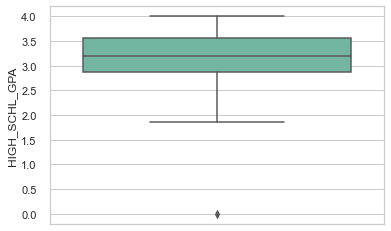

In [111]:
#HIGH_SCHL_GPA
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["HIGH_SCHL_GPA"],orient="v", palette="Set2")

In [112]:
# we see a outlier below lower bound
#before that we need to check for the null values and impute and then check for outlier  
#3.2	  median from summary table 
df4["HIGH_SCHL_GPA"].fillna(3.2,inplace=True)
df4["HIGH_SCHL_GPA"].isnull().sum()

0

In [113]:
#lets check outlerswith chebishevs rule 
# mean and std are=3.202738	0.455337	

print(3.202738-3*0.455337)
print(3.202738+3*0.455337)


1.8367270000000002
4.568749


In [114]:
df4[df4["HIGH_SCHL_GPA"]<1.8]
#only 1 record with 0  values which we can ignore 

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
2815,18,F,N,910.0,Off Campus,0,275.0,0.0,College/Beyond,College/Beyond,Bachelors,15,9,13.0,13.0,0,0,733140,0.0,others,others,N,others,3,3,5,1,4,4,ENGL 1101,MATH 1111,COMM 1110,others,others,POLS 1101


In [115]:
df4[df4["HIGH_SCHL_GPA"]>4.568749] # no records so no outliers

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n


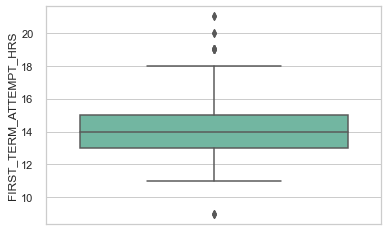

In [116]:
#FIRST_TERM_ATTEMPT_HRS = no nulls present need to check for outliers 
#boxplot shows indication of presence of outliers in points way from lower and upper bounds
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["FIRST_TERM_ATTEMPT_HRS"],orient="v", palette="Set2")

In [117]:
#lets check for outliers using Chebishevs rule
#mean and std=13.985882	1.554286	
print(13.985882-3*1.554286)
print(13.985882+3*1.554286)

9.323024
18.64874


In [118]:
df4[df4["FIRST_TERM_ATTEMPT_HRS"]<9] # no rows so no outliers 

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n


In [119]:
df4[df4["FIRST_TERM_ATTEMPT_HRS"]>18]
#we can imputee with next best value

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
393,18,F,Y,1260.0,Off Campus,0,69.0,3.00,High School,High School,Bachelors,19,19,12.0,12.0,0,108960,0,-108960.0,BGD 1,others,N,others,6,7,7,6,7,2,HIST 2111,others,others,others,others,Missing
658,18,M,Y,990.0,On Campus,1,90.0,3.53,High School,High School,Bachelors,20,19,23.0,23.0,0,269100,0,0.0,others,others,N,others,7,7,7,5,7,7,others,others,others,POLS 1101,others,MUSC 1100
664,19,F,N,830.0,Off Campus,0,69.0,3.20,No Information,No Information,Bachelors,21,21,16.0,12.0,0,301080,0,-781440.0,BGD 1,others,N,others,6,7,7,5,7,7,others,others,others,ENGL 1102,others,others
956,19,F,N,990.0,On Campus,0,69.0,3.20,No Information,No Information,Bachelors,21,21,17.0,15.0,0,0,0,-948120.0,BGD 1,others,N,others,6,6,7,6,6,2,others,others,others,ENGL 1102,others,Missing
1300,18,F,N,1070.0,On Campus,1,69.0,3.20,No Information,No Information,Bachelors,19,19,18.0,14.0,0,224640,0,-596040.0,BGD 1,others,N,others,6,7,7,5,6,6,MATH 1111,others,others,others,others,others
1494,18,F,N,870.0,Off Campus,1,69.0,2.67,High School,High School,Bachelors,19,19,15.0,11.0,0,0,0,0.0,BGD 3,others,N,others,5,6,6,5,6,2,others,ENGL 1101,others,COMM 1110,ENGL 1102,Missing
2046,18,M,Y,1220.0,On Campus,0,150.0,3.69,College/Beyond,College/Beyond,Bachelors,20,20,13.0,13.0,0,0,0,0.0,BGD 3,others,N,others,4,6,6,5,5,6,others,ENGL 1101,others,others,ENGL 1102,others
2414,18,M,Y,1150.0,On Campus,0,150.0,3.45,High School,High School,Bachelors,19,19,12.0,12.0,0,0,0,0.0,BGD 1,others,N,others,4,4,5,4,5,6,others,others,ENGL 1101,ENGL 1102,others,others
2595,18,M,Y,1030.0,Off Campus,1,69.0,3.57,No Information,No Information,Bachelors,19,14,14.0,7.0,0,0,0,0.0,BGD 1,Biology,N,SCHOOL 1,6,7,7,4,4,5,ENGL 1101,COMM 1110,others,ENGL 1102,POLS 1101,others
2893,18,F,Y,950.0,Off Campus,1,69.0,2.10,Other/Unknown,High School,Bachelors,19,15,12.0,2.0,0,0,356100,0.0,BGD 3,others,N,others,4,4,5,3,3,2,others,others,others,others,POLS 1101,Missing


In [120]:
df4["FIRST_TERM_ATTEMPT_HRS"] = np.where(df4["FIRST_TERM_ATTEMPT_HRS"] >18, 19,df4['FIRST_TERM_ATTEMPT_HRS'])

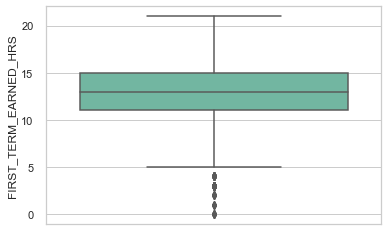

In [121]:
#FIRST_TERM_EARNED_HRS =no nulls , need to check for outliers 
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["FIRST_TERM_EARNED_HRS"],orient="v", palette="Set2")

In [122]:
# few outliers indicated by boxplot 
#lets check by rule 
#mean and std is 12.205000	2.986294
print(12.205000-3*2.986294)
print(12.205000+3*2.986294)

3.246118000000001
21.163882


In [123]:
df4[df4["FIRST_TERM_EARNED_HRS"]<3]
# which can b imputed by 3

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
746,18,M,Y,990.0,On Campus,1,69.0,2.45,High School,High School,Bachelors,13,0,14.0,10.0,1245480,1245480,0,596343.0,others,others,N,others,3,4,2,5,7,2,others,ENGL 1101,Missing,others,others,Missing
766,18,M,Y,1260.0,On Campus,1,150.0,2.62,No Information,No Information,Bachelors,12,2,12.0,10.0,0,301080,0,-6000.0,BGD 1,others,N,others,3,3,2,4,7,2,others,others,Missing,others,others,Missing
1826,18,M,Y,870.0,On Campus,1,69.0,2.80,College/Beyond,College/Beyond,Bachelors,13,0,16.0,10.0,0,0,0,0.0,BGD 3,Biology,N,SCHOOL 11,3,3,4,4,6,2,CHEM 1211,ENGL 1101,others,HIST 2111,COMM 1110,Missing
1827,18,M,Y,1110.0,Off Campus,1,69.0,2.40,High School,High School,Bachelors,12,0,11.0,11.0,0,0,0,0.0,BGD 1,others,N,SCHOOL 2,3,3,3,4,6,6,ENGL 1101,HIST 2111,others,others,others,others
2566,18,M,Y,910.0,Off Campus,1,69.0,2.64,College/Beyond,College/Beyond,Bachelors,15,0,12.0,9.0,0,1187280,5498640,-199440.0,BGD 1,others,N,SCHOOL 10,3,3,4,3,5,6,HIST 2111,MATH 1111,ENGL 1101,others,HIST 2111,others
2681,18,F,Y,950.0,Off Campus,0,69.0,3.18,College/Beyond,College/Beyond,Bachelors,12,2,12.0,12.0,0,403680,0,-347580.0,BGD 1,Biology,N,SCHOOL 10,3,3,6,4,4,6,others,others,others,others,others,others
2783,18,M,Y,830.0,Off Campus,1,69.0,2.62,High School,High School,Bachelors,14,0,12.0,6.0,0,372600,771840,0.0,BGD 3,others,N,SCHOOL 10,3,3,3,3,4,5,CHEM 1211,others,others,MATH 1111,others,others
2786,16,M,Y,990.0,Off Campus,0,69.0,2.61,College/Beyond,College/Beyond,Bachelors,15,2,19.0,12.0,0,0,0,0.0,BGD 3,others,N,SCHOOL 1,3,3,3,3,4,4,others,COMM 1110,ENGL 1101,others,others,others
2898,18,F,Y,1030.0,Off Campus,1,69.0,2.69,College/Beyond,No Information,Bachelors,14,2,12.0,6.0,0,0,0,0.0,BGD 1,Undeclared,N,others,4,4,4,3,3,4,others,MATH 1111,others,COMM 1110,others,others
2899,18,M,Y,870.0,Off Campus,1,69.0,3.20,College/Beyond,College/Beyond,Bachelors,12,0,15.0,6.0,290880,955500,664620,80880.0,BGD 3,others,N,others,3,4,4,3,3,4,others,ENGL 1101,HIST 2111,others,others,others


In [124]:
df4["FIRST_TERM_EARNED_HRS"] = np.where(df4["FIRST_TERM_EARNED_HRS"] <3, 3,df4['FIRST_TERM_EARNED_HRS'])

In [125]:
df4[df4["FIRST_TERM_EARNED_HRS"]>21]# no rows, so no outliers in upper bound

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n


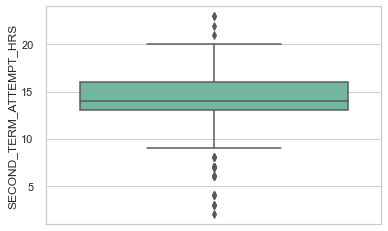

In [126]:
#SECOND_TERM_ATTEMPT_HRS = has missing values and outliers need to b checked 
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["SECOND_TERM_ATTEMPT_HRS"],orient="v", palette="Set2")

In [127]:
df4[df4["SECOND_TERM_ATTEMPT_HRS"]<7]

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
276,18,F,Y,1110.0,On Campus,0,69.0,3.00,College/Beyond,College/Beyond,Bachelors,15,7,6.0,6.0,0,0,0,0.0,BGD 1,others,N,others,3,5,5,7,7,2,others,others,others,ENGL 1102,others,Missing
2053,18,F,Y,1110.0,Off Campus,1,69.0,2.88,High School,Middle School/Junior High,Bachelors,13,9,4.0,4.0,1016760,1189920,173160,917160.0,BGD 1,others,N,others,1,6,6,5,5,2,HIST 2111,ENGL 1101,others,others,others,Missing
2864,19,F,Y,990.0,Off Campus,0,69.0,3.09,No Information,No Information,Bachelors,12,9,6.0,0.0,0,0,0,0.0,BGD 1,others,N,SCHOOL 2,4,5,2,3,3,2,others,ENGL 1101,Missing,others,others,Missing
3119,17,M,Y,990.0,Off Campus,0,69.0,2.50,No Information,No Information,Bachelors,12,6,4.0,3.0,0,0,0,0.0,BGD 1,others,N,SCHOOL 1,3,6,2,5,2,2,MATH 1111,others,Missing,POLS 1101,Missing,Missing
3120,18,F,Y,910.0,Off Campus,1,69.0,2.96,High School,College/Beyond,Bachelors,12,12,4.0,4.0,0,1176420,1334760,-299160.0,BGD 1,others,N,others,5,5,6,5,2,2,others,others,others,others,Missing,Missing
3151,18,M,Y,990.0,Off Campus,0,69.0,2.56,High School,College/Beyond,Bachelors,13,7,6.0,3.0,1346640,1346640,0,1017780.0,BGD 3,others,others,others,3,3,4,4,2,2,others,others,others,HIST 2111,Missing,Missing
3154,19,F,Y,740.0,Off Campus,0,69.0,2.65,Other/Unknown,College/Beyond,Bachelors,12,6,6.0,6.0,565560,955500,389940,355560.0,others,others,others,others,3,2,2,4,2,2,others,others,Missing,HIST 2111,Missing,Missing
3188,19,M,N,1340.0,Off Campus,0,69.0,2.00,High School,High School,Bachelors,12,12,3.0,3.0,570180,949560,379380,570180.0,BGD 1,others,N,others,7,7,7,2,2,2,others,MATH 1111,others,others,Missing,Missing
3225,19,F,Y,910.0,Off Campus,0,69.0,3.00,High School,High School,Bachelors,13,9,3.0,3.0,0,0,0,0.0,BGD 1,others,N,others,6,6,2,2,2,2,others,others,Missing,others,Missing,Missing
3314,18,F,Y,1110.0,Off Campus,0,69.0,3.47,College/Beyond,High School,Bachelors,15,12,3.0,0.0,0,1144200,1305780,-288180.0,others,Nursing,N,SCHOOL 130,4,5,6,2,2,2,others,others,ENGL 1101,others,Missing,Missing


In [128]:
df4["SECOND_TERM_ATTEMPT_HRS"].sort_values(ascending=False).unique()

array([23., 22., 21., 20., 19., 18., 17., 16., 15., 14., 13., 12., 11.,
       10.,  9.,  8.,  7.,  6.,  4.,  3.,  2., nan])

In [129]:
df4[df4["SECOND_TERM_ATTEMPT_HRS"]>20.599009]

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
326,18,M,Y,990.0,On Campus,1,150.0,3.54,High School,High School,Bachelors,16,12,21.0,21.0,0,0,0,0.0,BGD 1,others,N,others,7,7,7,6,7,7,others,others,others,others,others,others
658,18,M,Y,990.0,On Campus,1,90.0,3.53,High School,High School,Bachelors,19,19,23.0,23.0,0,269100,0,0.0,others,others,N,others,7,7,7,5,7,7,others,others,others,POLS 1101,others,MUSC 1100
1489,18,F,Y,590.0,On Campus,1,150.0,3.73,High School,College/Beyond,Bachelors,16,10,22.0,18.0,1315800,1418100,102300,362820.0,BGD 1,Pre-Nursing,N,others,5,6,6,5,6,6,others,others,others,others,COMM 1110,others
1720,18,F,Y,1220.0,Off Campus,1,69.0,3.37,College/Beyond,High School,Bachelors,15,15,23.0,23.0,0,0,0,0.0,BGD 3,others,N,SCHOOL 1,6,7,7,4,6,6,others,HIST 2111,others,MATH 1111,others,MUSC 1100


In [130]:
#for imputing in missing value we can use median as the best measure which is 14.0	
df4["SECOND_TERM_ATTEMPT_HRS"].fillna(14.0,inplace=True)

In [131]:
df4["SECOND_TERM_ATTEMPT_HRS"] = np.where(df4["SECOND_TERM_ATTEMPT_HRS"] <7, 7,df4['SECOND_TERM_ATTEMPT_HRS'])
df4["SECOND_TERM_ATTEMPT_HRS"] = np.where(df4["SECOND_TERM_ATTEMPT_HRS"] >20, 20,df4['SECOND_TERM_ATTEMPT_HRS'])

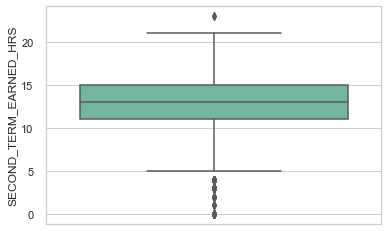

In [132]:
#SECOND_TERM_EARNED_HRS =nulls and outliers need to be checked 
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["SECOND_TERM_EARNED_HRS"],orient="v", palette="Set2")

In [133]:
# indication of outliers from boxpot , need to b inspected by the rule 
#mean and std=12.511125	3.470492	
print(12.511125-3*3.470492)
print(12.511125+3*3.470492)

2.0996489999999994
22.922601


In [134]:
df4[df4["SECOND_TERM_EARNED_HRS"]<2]

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
2793,18,M,Y,990.0,Off Campus,0,150.0,3.12,No Information,High School,Bachelors,15,6,12.0,0.0,0,0,0,0.0,BGD 3,others,N,others,1,3,3,3,4,2,ENGL 1101,COMM 1110,others,others,others,Missing
2828,18,F,Y,870.0,Off Campus,0,69.0,2.68,High School,High School,Bachelors,12,12,13.0,0.0,1257780,1316580,58800,807780.0,BGD 3,Undeclared,N,others,5,6,6,3,3,3,others,ENGL 1101,HIST 2111,ENGL 1102,others,others
2847,18,F,Y,950.0,Off Campus,0,69.0,3.32,College/Beyond,College/Beyond,Bachelors,13,13,12.0,0.0,0,0,0,0.0,BGD 1,Biology,N,SCHOOL 11,5,5,6,3,3,3,CHEM 1211,HIST 2111,others,others,ENGL 1102,POLS 1101
2857,18,F,Y,990.0,On Campus,1,150.0,2.70,No Information,No Information,Bachelors,13,10,15.0,0.0,0,0,0,0.0,BGD 3,Biology,N,others,4,5,6,3,3,3,CHEM 1211,others,MATH 1111,others,COMM 1110,ENGL 1102
2864,19,F,Y,990.0,Off Campus,0,69.0,3.09,No Information,No Information,Bachelors,12,9,7.0,0.0,0,0,0,0.0,BGD 1,others,N,SCHOOL 2,4,5,2,3,3,2,others,ENGL 1101,Missing,others,others,Missing
2868,18,M,Y,870.0,Off Campus,1,69.0,2.86,No Information,High School,Bachelors,13,9,13.0,0.0,1316580,1316580,0,811080.0,others,others,N,others,4,5,2,3,3,3,HIST 2111,ENGL 1101,Missing,others,others,ENGL 1102
2881,18,M,Y,1110.0,Off Campus,0,69.0,3.33,No Information,No Information,Bachelors,12,9,10.0,0.0,0,0,0,0.0,BGD 1,others,N,SCHOOL 2,3,5,6,3,3,3,others,others,others,others,HIST 2111,others
2886,17,F,N,990.0,Off Campus,0,69.0,3.00,High School,College/Beyond,Bachelors,17,14,10.0,0.0,0,0,0,0.0,BGD 3,others,N,others,4,4,4,3,3,2,others,ENGL 1101,HIST 2111,others,POLS 1101,Missing
2900,18,M,Y,870.0,Off Campus,1,69.0,3.00,College/Beyond,College/Beyond,Bachelors,13,9,12.0,0.0,0,0,0,0.0,others,others,N,SCHOOL 1,3,4,6,3,3,3,others,others,ENGL 1101,others,others,POLS 1101
2910,18,F,Y,1070.0,Off Campus,1,69.0,2.93,College/Beyond,High School,Bachelors,16,9,12.0,0.0,974400,1171380,196980,570240.0,BGD 1,others,others,SCHOOL 130,3,4,5,3,3,5,HIST 2111,COMM 1110,others,ENGL 1102,others,others


In [135]:
df4[df4["SECOND_TERM_EARNED_HRS"]>23]#no outliers in upper bound

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n


In [136]:
df4["SECOND_TERM_EARNED_HRS"] = np.where(df4["SECOND_TERM_EARNED_HRS"] <2, 2,df4['SECOND_TERM_EARNED_HRS'])

In [137]:
#missing values need to be imputed with median as the best possible value ,median= 13.0	
df4["SECOND_TERM_EARNED_HRS"].fillna(13,inplace=True)

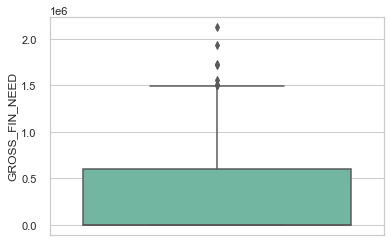

In [138]:
#GROSS_FIN_NEED =need to check for tthe high no. of zeroes and outliers if any 
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["GROSS_FIN_NEED"],orient="v", palette="Set2")

In [139]:
#we need to check for the high number if zeroes 
df4[df4["GROSS_FIN_NEED"]<1]  # 2237/3400  , 65.8% zeroes since there is no best imputer leaviing a zero

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
0,18,F,Y,1150.0,On Campus,0,150.0,4.00,No Information,No Information,Bachelors,16,16,14.0,14.0,0,0,0,0.0,BGD 1,Undeclared,N,others,7,7,7,7,7,7,others,others,others,others,others,COMM 1110
2,18,M,Y,1030.0,On Campus,1,150.0,3.39,High School,Other/Unknown,Bachelors,15,15,14.0,14.0,0,0,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,ENGL 1101,HIST 2111,ENGL 1102,others,MUSC 1100
3,18,M,Y,1220.0,On Campus,1,150.0,2.93,College/Beyond,College/Beyond,Bachelors,13,13,14.0,14.0,0,0,0,0.0,BGD 1,Undeclared,N,others,7,7,2,7,7,7,others,COMM 1110,Missing,ENGL 1102,others,others
5,18,M,Y,1070.0,Off Campus,1,69.0,4.00,High School,College/Beyond,Bachelors,15,15,16.0,16.0,0,0,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,HIST 2112,others,others,others,others
6,18,F,Y,590.0,Off Campus,1,69.0,3.93,No Information,No Information,Bachelors,16,16,15.0,15.0,0,0,0,0.0,BGD 1,Biology,N,SCHOOL 2,7,7,7,7,7,2,others,others,others,ENGL 1102,others,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,F,N,790.0,Off Campus,0,871.0,3.93,No Information,No Information,Bachelors,18,18,16.0,13.0,0,0,0,0.0,others,others,N,others,7,2,2,2,2,2,COMM 1110,others,Missing,others,Missing,Missing
3396,18,F,Y,950.0,Off Campus,0,69.0,2.69,No Information,No Information,Bachelors,13,9,14.0,13.0,0,0,0,0.0,BGD 1,Biology,N,SCHOOL 11,6,2,2,2,2,2,others,others,Missing,POLS 1101,Missing,Missing
3397,18,F,Y,1030.0,On Campus,0,90.0,2.76,Other/Unknown,High School,Bachelors,14,6,14.0,13.0,0,945840,1288980,0.0,others,Biology,N,others,5,2,2,2,2,2,ENGL 1101,others,Missing,others,Missing,Missing
3398,18,F,Y,990.0,Off Campus,1,69.0,3.56,High School,College/Beyond,Bachelors,12,9,14.0,13.0,0,269100,0,-231720.0,BGD 3,others,N,others,5,2,2,2,2,2,others,others,Missing,others,Missing,Missing


In [140]:
#let check outlier with rule 
#mean and std is 303402.506471	483625.450816
print(303402.506471-3*483625.450816)
print(303402.506471+3*483625.450816)

-1147473.8459770002
1754278.858919


In [141]:
df4[df4["GROSS_FIN_NEED"]>1754278]

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
1829,18,F,N,910.0,On Campus,1,871.0,2.86,Middle School/Junior High,College/Beyond,Bachelors,16,6,7.0,7.0,1933800,2082900,149100,749040.0,BGD 1,others,N,others,3,3,5,4,6,7,others,others,others,others,others,others
2865,18,F,N,910.0,Off Campus,0,69.0,2.87,High School,College/Beyond,Bachelors,12,12,12.0,6.0,2124900,2124900,0,1478400.0,BGD 1,others,N,others,4,5,5,3,3,5,others,COMM 1110,ENGL 1101,ENGL 1102,others,others


In [142]:
df4["GROSS_FIN_NEED"] = np.where(df4["GROSS_FIN_NEED"] <1754278, 1754278,df4['GROSS_FIN_NEED'])

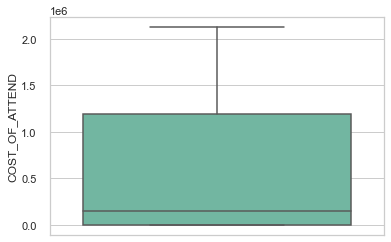

In [143]:
#COST_OF_ATTEND need to check the high zeroes and outliers
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["COST_OF_ATTEND"],orient="v", palette="Set2")

In [144]:
#lets check for outliers and then the zeroes
#mean and std= 551533.517647	606440.325202	
print(551533.517647-3*606440.325202)
print(551533.517647+3*606440.325202)


-1267787.457959
2370854.493253


In [145]:
df4[df4["COST_OF_ATTEND"]>2370854]# no records so no outliers in upper bound 

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n


In [146]:
df4[df4["COST_OF_ATTEND"]<1] #1679 /3400=0.493823 almost 50% of values are zero, bu imputing will affect a lot so will keep as it is 

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
0,18,F,Y,1150.0,On Campus,0,150.0,4.00,No Information,No Information,Bachelors,16,16,14.0,14.0,1754278,0,0,0.0,BGD 1,Undeclared,N,others,7,7,7,7,7,7,others,others,others,others,others,COMM 1110
2,18,M,Y,1030.0,On Campus,1,150.0,3.39,High School,Other/Unknown,Bachelors,15,15,14.0,14.0,1754278,0,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,ENGL 1101,HIST 2111,ENGL 1102,others,MUSC 1100
3,18,M,Y,1220.0,On Campus,1,150.0,2.93,College/Beyond,College/Beyond,Bachelors,13,13,14.0,14.0,1754278,0,0,0.0,BGD 1,Undeclared,N,others,7,7,2,7,7,7,others,COMM 1110,Missing,ENGL 1102,others,others
5,18,M,Y,1070.0,Off Campus,1,69.0,4.00,High School,College/Beyond,Bachelors,15,15,16.0,16.0,1754278,0,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,HIST 2112,others,others,others,others
6,18,F,Y,590.0,Off Campus,1,69.0,3.93,No Information,No Information,Bachelors,16,16,15.0,15.0,1754278,0,0,0.0,BGD 1,Biology,N,SCHOOL 2,7,7,7,7,7,2,others,others,others,ENGL 1102,others,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,19,M,N,1070.0,Off Campus,0,69.0,3.20,High School,High School,Bachelors,15,3,14.0,13.0,1754278,0,467520,0.0,BGD 1,Undeclared,N,others,1,3,3,2,2,2,others,others,others,POLS 1101,Missing,Missing
3394,18,F,Y,990.0,On Campus,0,138.0,3.21,High School,High School,Bachelors,13,3,14.0,13.0,1754278,0,0,0.0,BGD 1,others,N,others,1,1,2,2,2,2,ENGL 1101,others,Missing,others,Missing,Missing
3395,18,F,N,790.0,Off Campus,0,871.0,3.93,No Information,No Information,Bachelors,18,18,16.0,13.0,1754278,0,0,0.0,others,others,N,others,7,2,2,2,2,2,COMM 1110,others,Missing,others,Missing,Missing
3396,18,F,Y,950.0,Off Campus,0,69.0,2.69,No Information,No Information,Bachelors,13,9,14.0,13.0,1754278,0,0,0.0,BGD 1,Biology,N,SCHOOL 11,6,2,2,2,2,2,others,others,Missing,POLS 1101,Missing,Missing


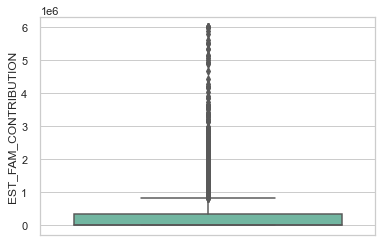

In [147]:
#EST_FAM_CONTRIBUTION -check for high zeroes and outliers if any
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["EST_FAM_CONTRIBUTION"],orient="v", palette="Set2")

In [148]:
#lets check for outliers 
#mean and std =344689.923529	787187.774837
print(344689.923529-3*787187.774837)
print(344689.923529+3*787187.774837)

-2016873.400982
2706253.24804


In [149]:
df4[df4["EST_FAM_CONTRIBUTION"]>2706253]

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
11,18,F,Y,1070.0,Off Campus,0,69.0,4.00,Middle School/Junior High,High School,Bachelors,16,16,16.0,16.0,1754278,1189920,5163240,-326880.0,BGD 1,Undeclared,N,SCHOOL 11,7,7,7,7,7,7,others,others,others,others,ENGL 1102,others
22,18,F,Y,1190.0,Off Campus,1,69.0,3.50,College/Beyond,College/Beyond,Bachelors,13,13,16.0,16.0,1754278,1189920,5328600,-326880.0,BGD 1,Nursing,N,SCHOOL 2,7,7,7,7,7,7,others,others,ENGL 1101,others,COMM 1110,ENGL 1102
124,18,F,Y,950.0,On Campus,1,150.0,3.52,College/Beyond,College/Beyond,Bachelors,15,15,14.0,14.0,1754278,1233900,2970000,-374880.0,BGD 1,Nursing,N,others,6,7,7,7,7,7,COMM 1110,ENGL 1101,MATH 1111,others,others,ENGL 1102
126,18,M,Y,1260.0,On Campus,1,150.0,4.00,College/Beyond,College/Beyond,Bachelors,13,13,14.0,14.0,1754278,1418100,3149520,-481200.0,BGD 1,others,N,others,6,7,7,7,7,2,COMM 1110,others,others,ENGL 1102,others,Missing
133,18,F,Y,1070.0,Off Campus,1,69.0,3.93,College/Beyond,College/Beyond,Bachelors,14,14,16.0,13.0,1754278,1171380,2852940,-299160.0,BGD 1,others,N,SCHOOL 11,6,7,7,7,7,7,ENGL 1101,others,others,ENGL 1102,others,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,18,M,Y,990.0,On Campus,1,69.0,2.80,College/Beyond,College/Beyond,Bachelors,13,9,12.0,9.0,1754278,1176420,4268400,-199440.0,BGD 1,Biology,N,others,5,5,6,5,2,2,ENGL 1101,others,COMM 1110,ENGL 1102,Missing,Missing
3148,18,M,Y,870.0,On Campus,1,188.0,3.29,High School,High School,Bachelors,17,10,13.0,11.0,1754278,0,5017740,0.0,BGD 1,others,N,others,3,5,2,4,2,2,COMM 1110,ENGL 1101,Missing,others,Missing,Missing
3195,19,M,Y,990.0,Off Campus,0,138.0,3.83,College/Beyond,High School,Bachelors,14,14,15.0,15.0,1754278,1296900,3631800,-347580.0,BGD 1,others,N,others,6,7,7,2,2,2,others,ENGL 1101,others,others,Missing,Missing
3210,18,M,Y,950.0,Off Campus,0,69.0,3.35,College/Beyond,High School,Bachelors,12,12,14.0,13.0,1754278,1245480,2925960,-217920.0,others,Undeclared,N,others,6,6,6,2,2,2,COMM 1110,others,others,COMM 1110,Missing,Missing


In [150]:
df4["EST_FAM_CONTRIBUTION"] = np.where(df4["EST_FAM_CONTRIBUTION"] >2706253, 2706253,df4['EST_FAM_CONTRIBUTION'])

In [151]:
df4[df4["EST_FAM_CONTRIBUTION"]<1]#2112/3400=0.62117 , 62% of values are zero ,this much cannot be umputed 

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
0,18,F,Y,1150.0,On Campus,0,150.0,4.00,No Information,No Information,Bachelors,16,16,14.0,14.0,1754278,0,0,0.0,BGD 1,Undeclared,N,others,7,7,7,7,7,7,others,others,others,others,others,COMM 1110
2,18,M,Y,1030.0,On Campus,1,150.0,3.39,High School,Other/Unknown,Bachelors,15,15,14.0,14.0,1754278,0,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,ENGL 1101,HIST 2111,ENGL 1102,others,MUSC 1100
3,18,M,Y,1220.0,On Campus,1,150.0,2.93,College/Beyond,College/Beyond,Bachelors,13,13,14.0,14.0,1754278,0,0,0.0,BGD 1,Undeclared,N,others,7,7,2,7,7,7,others,COMM 1110,Missing,ENGL 1102,others,others
5,18,M,Y,1070.0,Off Campus,1,69.0,4.00,High School,College/Beyond,Bachelors,15,15,16.0,16.0,1754278,0,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,HIST 2112,others,others,others,others
6,18,F,Y,590.0,Off Campus,1,69.0,3.93,No Information,No Information,Bachelors,16,16,15.0,15.0,1754278,0,0,0.0,BGD 1,Biology,N,SCHOOL 2,7,7,7,7,7,2,others,others,others,ENGL 1102,others,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,18,F,Y,990.0,On Campus,0,138.0,3.21,High School,High School,Bachelors,13,3,14.0,13.0,1754278,0,0,0.0,BGD 1,others,N,others,1,1,2,2,2,2,ENGL 1101,others,Missing,others,Missing,Missing
3395,18,F,N,790.0,Off Campus,0,871.0,3.93,No Information,No Information,Bachelors,18,18,16.0,13.0,1754278,0,0,0.0,others,others,N,others,7,2,2,2,2,2,COMM 1110,others,Missing,others,Missing,Missing
3396,18,F,Y,950.0,Off Campus,0,69.0,2.69,No Information,No Information,Bachelors,13,9,14.0,13.0,1754278,0,0,0.0,BGD 1,Biology,N,SCHOOL 11,6,2,2,2,2,2,others,others,Missing,POLS 1101,Missing,Missing
3398,18,F,Y,990.0,Off Campus,1,69.0,3.56,High School,College/Beyond,Bachelors,12,9,14.0,13.0,1754278,269100,0,-231720.0,BGD 3,others,N,others,5,2,2,2,2,2,others,others,Missing,others,Missing,Missing


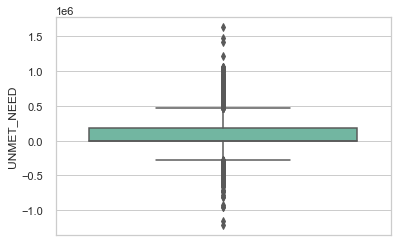

In [152]:
#UNMET_NEED-high zeroes and outliers need to be checked 
sns.set(style="whitegrid")
ax = sns.boxplot(x=df4["UNMET_NEED"],orient="v", palette="Set2")

In [153]:
#lets check for outliers
#mean and std =72220.516412	279567.921396
print(72220.516412-3*279567.921396)
print(72220.516412+3*279567.921396)

-766483.2477760001
910924.2805999999


In [154]:
df4[df4["UNMET_NEED"]>910924]#23 rows with ranges from 9lack ,10 lack

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
100,18,F,N,1190.0,Off Campus,1,69.0,3.46,College/Beyond,High School,Bachelors,15,15,16.0,16.0,1754278,1504980,0,1216980.0,BGD 1,others,N,others,7,7,7,7,7,7,others,others,others,others,others,ENGL 1102
315,18,F,Y,640.0,Off Campus,1,69.0,4.00,Other/Unknown,High School,Bachelors,13,13,15.0,15.0,1754278,1489080,0,946920.0,BGD 3,Biology,N,others,7,7,2,6,7,7,COMM 1110,ENGL 1101,Missing,others,ENGL 1102,others
471,17,M,Y,530.0,Off Campus,1,69.0,3.40,Middle School/Junior High,High School,Bachelors,16,16,17.0,17.0,1754278,1504980,1080,919740.0,others,Biology,N,others,6,6,7,6,7,7,COMM 1110,MATH 1111,others,POLS 1101,ENGL 1102,others
675,18,M,Y,640.0,Off Campus,1,69.0,3.40,Other/Unknown,College/Beyond,Bachelors,16,16,15.0,15.0,1754278,1466460,236460,917820.0,BGD 1,Biology,N,others,5,7,7,5,7,2,ENGL 1101,HIST 2112,others,others,others,Missing
709,18,F,Y,1030.0,Off Campus,1,69.0,3.07,Other/Unknown,College/Beyond,Bachelors,13,13,12.0,12.0,1754278,1489080,0,983640.0,BGD 1,Undeclared,N,SCHOOL 1,5,6,6,5,7,2,ENGL 1101,HIST 2111,others,ENGL 1102,COMM 1110,Missing
1417,19,M,Y,990.0,Off Campus,1,69.0,3.00,Other/Unknown,Middle School/Junior High,Bachelors,13,10,16.0,13.0,1754278,1285860,0,946260.0,BGD 1,others,N,SCHOOL 10,6,6,2,5,6,7,others,others,Missing,others,POLS 1101,others
1668,17,M,Y,830.0,Off Campus,1,69.0,2.33,Other/Unknown,College/Beyond,Bachelors,15,9,13.0,13.0,1754278,1296900,0,944040.0,others,others,N,SCHOOL 10,4,4,5,5,6,6,others,HIST 2112,ENGL 1101,ENGL 1102,COMM 1110,others
1670,18,F,N,950.0,Off Campus,1,69.0,3.38,High School,High School,Bachelors,15,15,16.0,13.0,1754278,1504980,0,1059480.0,others,Nursing,N,others,4,4,5,5,6,6,others,HIST 2111,ENGL 1101,POLS 1101,others,ENGL 1102
1686,18,F,Y,870.0,Off Campus,0,69.0,3.06,High School,College/Beyond,Bachelors,16,13,15.0,15.0,1754278,1296900,0,944040.0,BGD 3,others,N,others,3,4,5,5,6,6,HIST 2111,others,others,others,others,others
1961,18,F,N,950.0,On Campus,1,69.0,2.57,College/Beyond,College/Beyond,Bachelors,15,15,16.0,16.0,1754278,1804860,607560,987300.0,BGD 1,others,N,others,6,6,6,5,5,6,ENGL 1101,others,others,others,others,ENGL 1102


In [155]:
df4["UNMET_NEED"] = np.where(df4["UNMET_NEED"] >910924, 910924,df4['UNMET_NEED'])

In [156]:
df4[df4["UNMET_NEED"]<1]#2363/3400=0.695, 69% data is zero/nagative out of 12 values negative, 

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
0,18,F,Y,1150.0,On Campus,0,150.0,4.00,No Information,No Information,Bachelors,16,16,14.0,14.0,1754278,0,0,0.0,BGD 1,Undeclared,N,others,7,7,7,7,7,7,others,others,others,others,others,COMM 1110
2,18,M,Y,1030.0,On Campus,1,150.0,3.39,High School,Other/Unknown,Bachelors,15,15,14.0,14.0,1754278,0,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,ENGL 1101,HIST 2111,ENGL 1102,others,MUSC 1100
3,18,M,Y,1220.0,On Campus,1,150.0,2.93,College/Beyond,College/Beyond,Bachelors,13,13,14.0,14.0,1754278,0,0,0.0,BGD 1,Undeclared,N,others,7,7,2,7,7,7,others,COMM 1110,Missing,ENGL 1102,others,others
5,18,M,Y,1070.0,Off Campus,1,69.0,4.00,High School,College/Beyond,Bachelors,15,15,16.0,16.0,1754278,0,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,HIST 2112,others,others,others,others
6,18,F,Y,590.0,Off Campus,1,69.0,3.93,No Information,No Information,Bachelors,16,16,15.0,15.0,1754278,0,0,0.0,BGD 1,Biology,N,SCHOOL 2,7,7,7,7,7,2,others,others,others,ENGL 1102,others,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,F,N,790.0,Off Campus,0,871.0,3.93,No Information,No Information,Bachelors,18,18,16.0,13.0,1754278,0,0,0.0,others,others,N,others,7,2,2,2,2,2,COMM 1110,others,Missing,others,Missing,Missing
3396,18,F,Y,950.0,Off Campus,0,69.0,2.69,No Information,No Information,Bachelors,13,9,14.0,13.0,1754278,0,0,0.0,BGD 1,Biology,N,SCHOOL 11,6,2,2,2,2,2,others,others,Missing,POLS 1101,Missing,Missing
3397,18,F,Y,1030.0,On Campus,0,90.0,2.76,Other/Unknown,High School,Bachelors,14,6,14.0,13.0,1754278,945840,1288980,0.0,others,Biology,N,others,5,2,2,2,2,2,ENGL 1101,others,Missing,others,Missing,Missing
3398,18,F,Y,990.0,Off Campus,1,69.0,3.56,High School,College/Beyond,Bachelors,12,9,14.0,13.0,1754278,269100,0,-231720.0,BGD 3,others,N,others,5,2,2,2,2,2,others,others,Missing,others,Missing,Missing


In [157]:
df4["UNMET_NEED"]=df4["UNMET_NEED"].map(abs)

In [158]:
#Multivariate Analysis
df4.columns

Index(['STDNT_AGE', 'STDNT_GENDER', 'IN_STATE_FLAG',
       'STDNT_TEST_ENTRANCE_COMB', 'HOUSING_STS', 'RETURNED_2ND_YR',
       'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'FATHER_HI_EDU_DESC',
       'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_DESC', 'FIRST_TERM_ATTEMPT_HRS',
       'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS',
       'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND',
       'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'STDNT_BACKGROUND_n',
       'STDNT_MAJOR_n', 'STDNT_MINOR_n', 'HIGH_SCHL_NAME_n',
       'CORE_COURSE_GRADE_1_F_n', 'CORE_COURSE_GRADE_2_F_n',
       'CORE_COURSE_GRADE_3_F_n', 'CORE_COURSE_GRADE_1_S_n',
       'CORE_COURSE_GRADE_2_S_n', 'CORE_COURSE_GRADE_3_S_n',
       'CORE_COURSE_NAME_1_F_n', 'CORE_COURSE_NAME_2_F_n',
       'CORE_COURSE_NAME_3_F_n', 'CORE_COURSE_NAME_1_S_n',
       'CORE_COURSE_NAME_2_S_n', 'CORE_COURSE_NAME_3_S_n'],
      dtype='object')

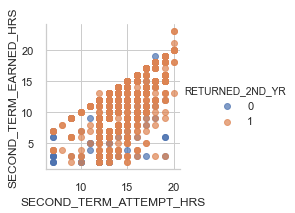

In [159]:
#g = sns.FacetGrid(df4, col="STDNT_GENDER", hue="RETURNED_2ND_YR")
g = sns.FacetGrid(df4,hue="RETURNED_2ND_YR")
g.map(plt.scatter, "SECOND_TERM_ATTEMPT_HRS", "SECOND_TERM_EARNED_HRS", alpha=.7)
g.add_legend();

In [160]:
 
#scatterplot
#sns.set()
cols = ['STDNT_AGE', 'STDNT_TEST_ENTRANCE_COMB', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA','EST_FAM_CONTRIBUTION','UNMET_NEED']
cols1=['STDNT_TEST_ENTRANCE_COMB','RETURNED_2ND_YR','HIGH_SCHL_GPA','FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS','SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS']
cols2=['GROSS_FIN_NEED','EST_FAM_CONTRIBUTION','UNMET_NEED','RETURNED_2ND_YR']
#sns.pairplot(df4[cols], size = 3.5)

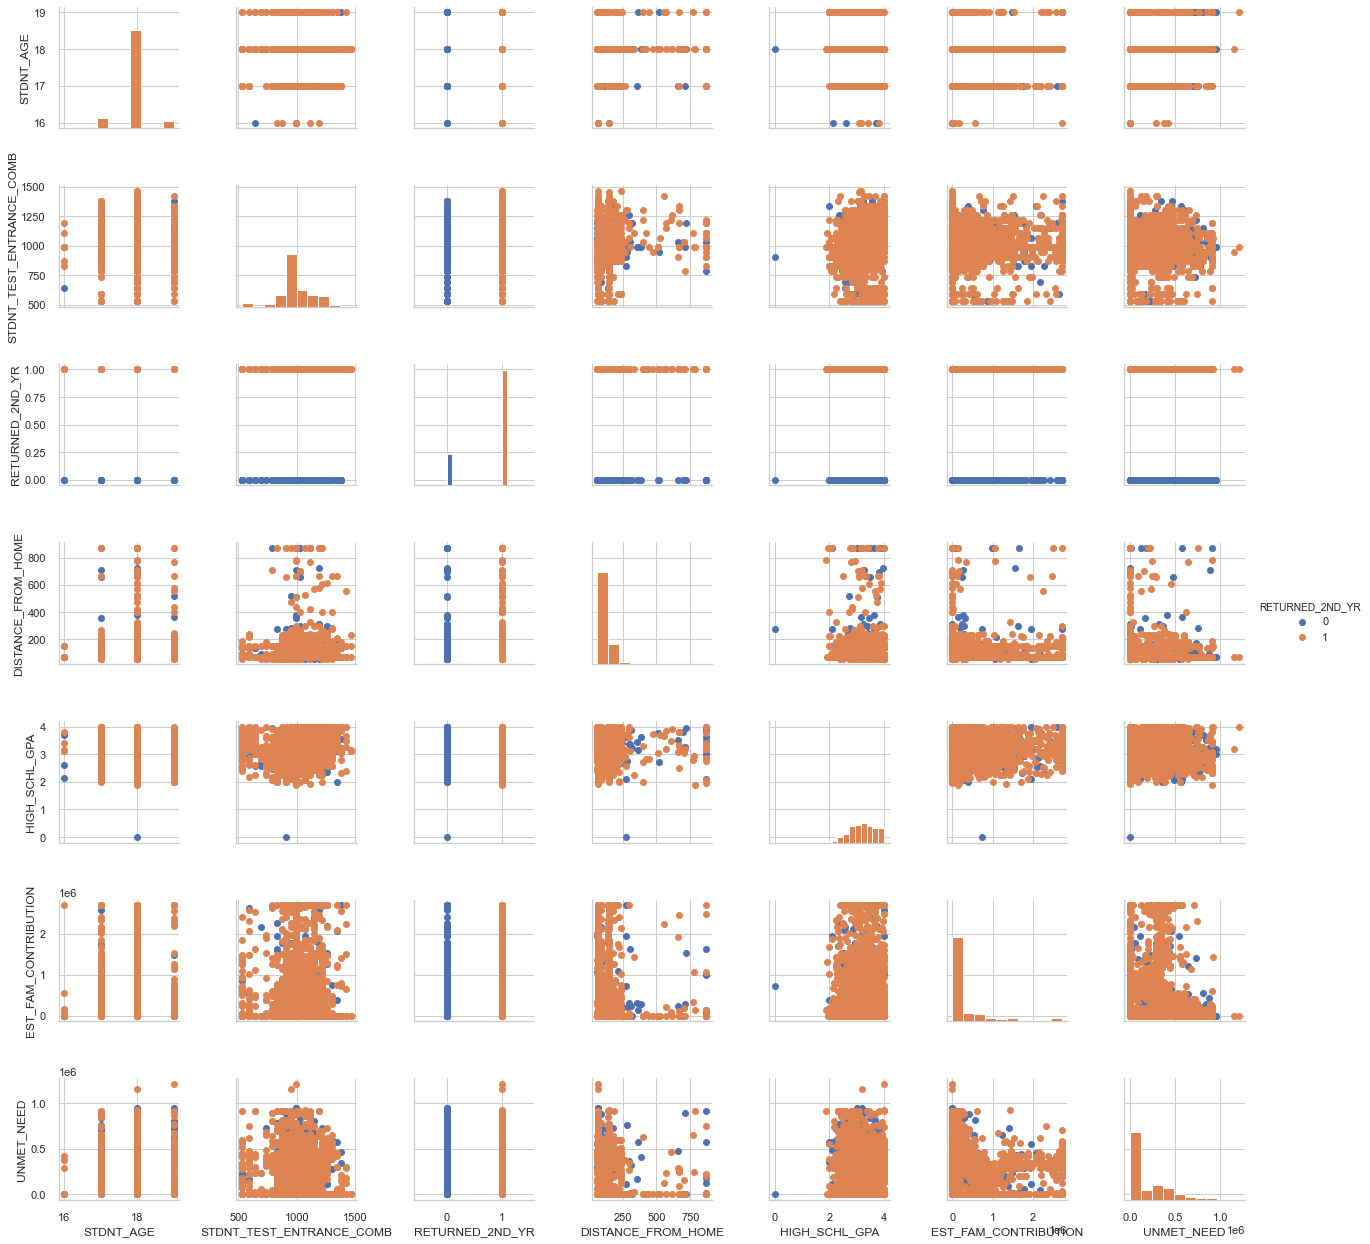

In [161]:
g = sns.PairGrid(df4[cols], hue="RETURNED_2ND_YR")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

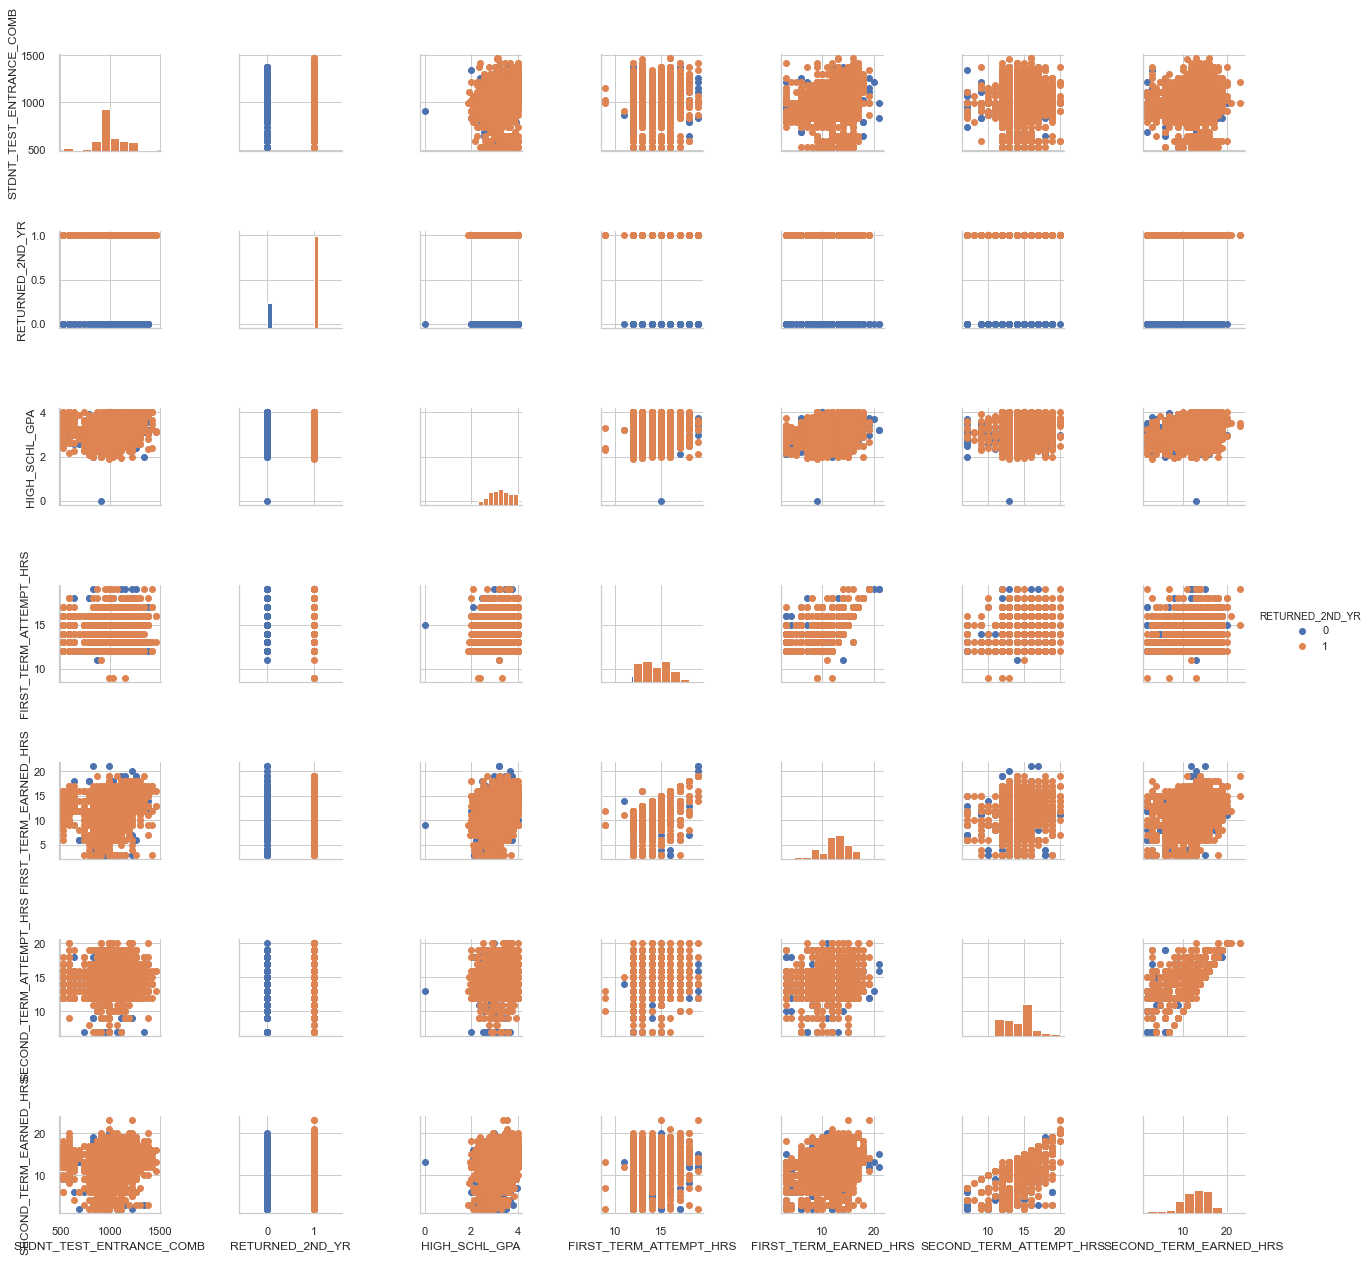

In [162]:
g = sns.PairGrid(df4[cols1], hue="RETURNED_2ND_YR")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

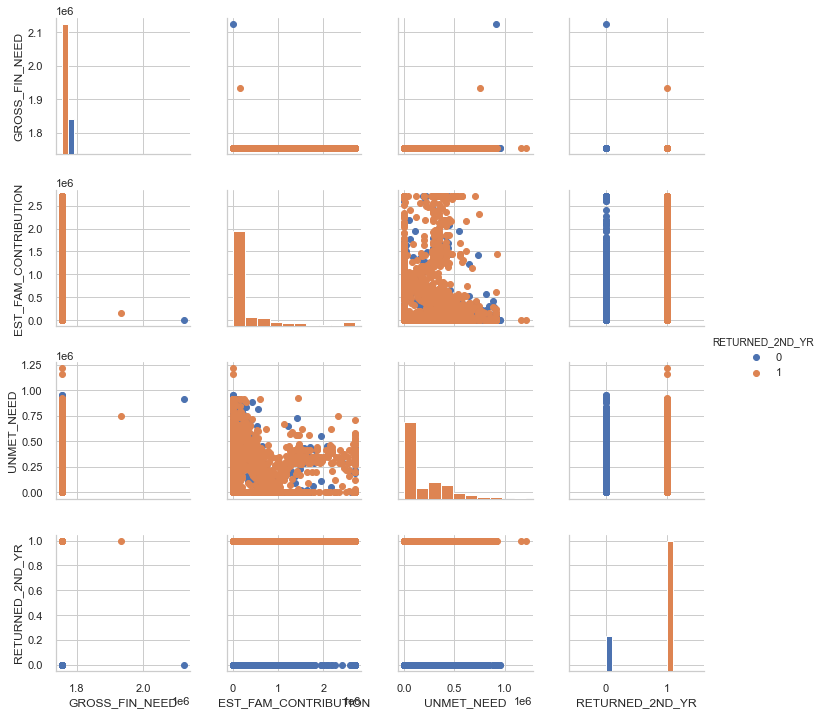

In [163]:
g = sns.PairGrid(df4[cols2], hue="RETURNED_2ND_YR")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

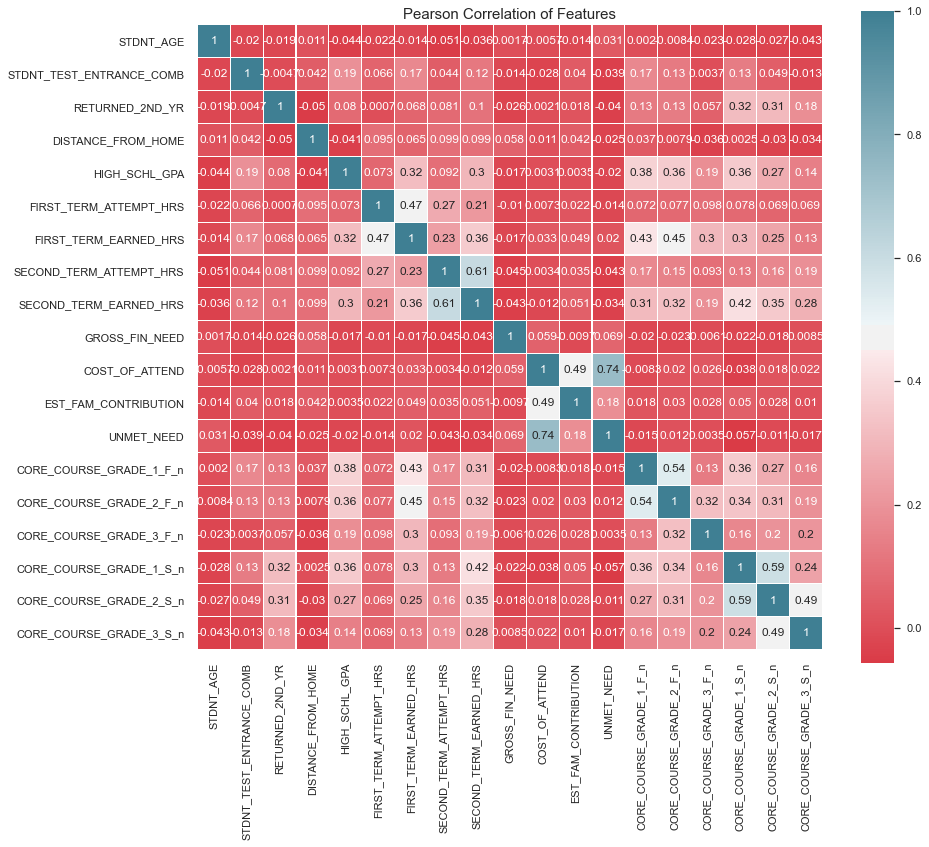

In [164]:
#to check the corrilation amoung variables 


plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df4.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

In [165]:
# from figure we can see the following features is highlly corrilated 
#UNMET_NEED= COST_OF_ATTEND
# we can delete  COST_OF_ATTEND

df4.drop("COST_OF_ATTEND",axis=1,inplace=True)

In [166]:
df4.shape

(3400, 34)

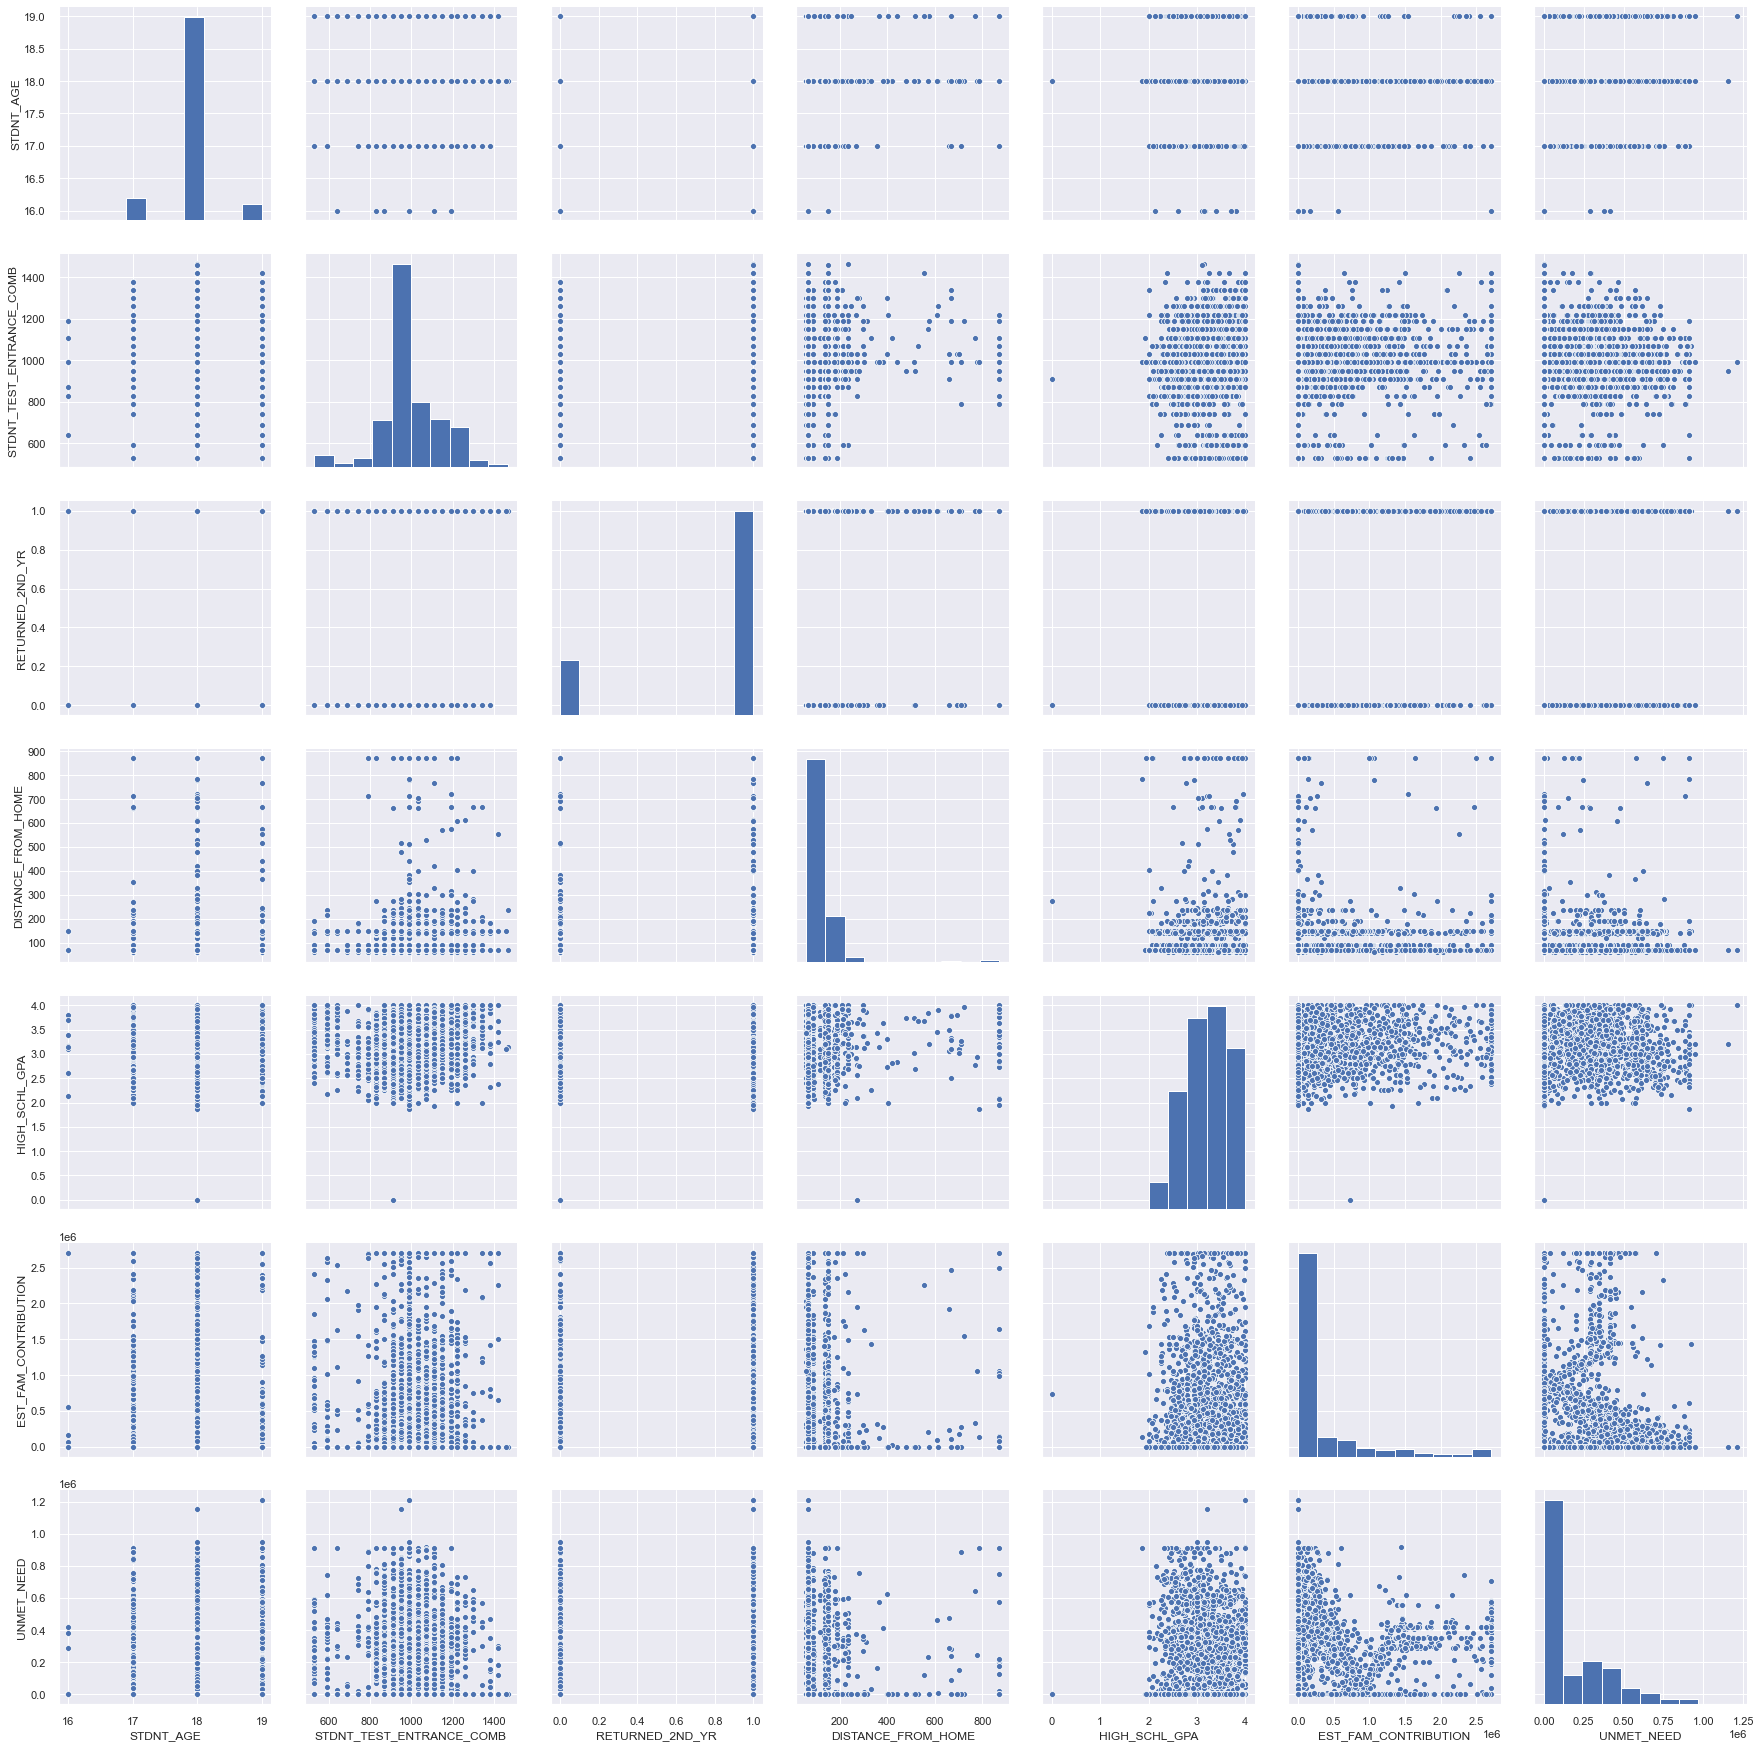

In [167]:

#scatterplot
sns.set()
cols = ['STDNT_AGE', 'STDNT_TEST_ENTRANCE_COMB', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA','EST_FAM_CONTRIBUTION','UNMET_NEED']
sns.pairplot(df4[cols], size = 3.5)

In [168]:
#lets scale the data using min max scalar 
df5=df4.copy()
df5.head()

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n
0,18,F,Y,1150.0,On Campus,0,150.0,4.00,No Information,No Information,Bachelors,16,16,14.0,14.0,1754278,0,0.0,BGD 1,Undeclared,N,others,7,7,7,7,7,7,others,others,others,others,others,COMM 1110
1,19,F,N,1190.0,Off Campus,1,69.0,2.89,College/Beyond,College/Beyond,Bachelors,18,18,18.0,18.0,1754278,785760,459300.0,BGD 1,Undeclared,N,others,7,7,7,7,7,2,others,others,others,others,ENGL 1102,Missing
2,18,M,Y,1030.0,On Campus,1,150.0,3.39,High School,Other/Unknown,Bachelors,15,15,14.0,14.0,1754278,0,0.0,BGD 1,others,N,others,7,7,7,7,7,7,others,ENGL 1101,HIST 2111,ENGL 1102,others,MUSC 1100
3,18,M,Y,1220.0,On Campus,1,150.0,2.93,College/Beyond,College/Beyond,Bachelors,13,13,14.0,14.0,1754278,0,0.0,BGD 1,Undeclared,N,others,7,7,2,7,7,7,others,COMM 1110,Missing,ENGL 1102,others,others
4,18,F,Y,1190.0,Off Campus,1,69.0,3.86,College/Beyond,High School,Bachelors,12,12,12.0,12.0,1754278,519840,278340.0,BGD 1,others,N,SCHOOL 2,7,7,7,7,7,7,others,others,others,COMM 1110,others,others


In [169]:
feature_scale=[feature for feature in df5.columns if feature in ['GROSS_FIN_NEED','EST_FAM_CONTRIBUTION',"UNMET_NEED","STDNT_TEST_ENTRANCE_COMB"]]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df5[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [170]:
scaler.transform(df5[feature_scale])

array([[0.66239316, 0.        , 0.        , 0.        ],
       [0.70512821, 0.        , 0.29034979, 0.37893788],
       [0.53418803, 0.        , 0.        , 0.        ],
       ...,
       [0.53418803, 0.        , 0.47629693, 0.        ],
       [0.49145299, 0.        , 0.        , 0.19117676],
       [0.36324786, 0.        , 0.        , 0.        ]])

In [171]:
feature_unscaled=[feature for feature in df5.columns if feature not in ['GROSS_FIN_NEED','EST_FAM_CONTRIBUTION',"UNMET_NEED","STDNT_TEST_ENTRANCE_COMB"]]

In [172]:
data = pd.concat([df5[feature_unscaled],
                    pd.DataFrame(scaler.transform(df5[feature_scale]), columns=feature_scale)],
                    axis=1)

In [173]:
data.head()

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,STDNT_BACKGROUND_n,STDNT_MAJOR_n,STDNT_MINOR_n,HIGH_SCHL_NAME_n,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,CORE_COURSE_NAME_1_F_n,CORE_COURSE_NAME_2_F_n,CORE_COURSE_NAME_3_F_n,CORE_COURSE_NAME_1_S_n,CORE_COURSE_NAME_2_S_n,CORE_COURSE_NAME_3_S_n,STDNT_TEST_ENTRANCE_COMB,GROSS_FIN_NEED,EST_FAM_CONTRIBUTION,UNMET_NEED
0,18,F,Y,On Campus,0,150.0,4.00,No Information,No Information,Bachelors,16,16,14.0,14.0,BGD 1,Undeclared,N,others,7,7,7,7,7,7,others,others,others,others,others,COMM 1110,0.662393,0.0,0.000000,0.000000
1,19,F,N,Off Campus,1,69.0,2.89,College/Beyond,College/Beyond,Bachelors,18,18,18.0,18.0,BGD 1,Undeclared,N,others,7,7,7,7,7,2,others,others,others,others,ENGL 1102,Missing,0.705128,0.0,0.290350,0.378938
2,18,M,Y,On Campus,1,150.0,3.39,High School,Other/Unknown,Bachelors,15,15,14.0,14.0,BGD 1,others,N,others,7,7,7,7,7,7,others,ENGL 1101,HIST 2111,ENGL 1102,others,MUSC 1100,0.534188,0.0,0.000000,0.000000
3,18,M,Y,On Campus,1,150.0,2.93,College/Beyond,College/Beyond,Bachelors,13,13,14.0,14.0,BGD 1,Undeclared,N,others,7,7,2,7,7,7,others,COMM 1110,Missing,ENGL 1102,others,others,0.737179,0.0,0.000000,0.000000
4,18,F,Y,Off Campus,1,69.0,3.86,College/Beyond,High School,Bachelors,12,12,12.0,12.0,BGD 1,others,N,SCHOOL 2,7,7,7,7,7,7,others,others,others,COMM 1110,others,others,0.705128,0.0,0.192088,0.229640


In [174]:
data1=pd.get_dummies(data)

In [175]:
data1.shape

(3400, 90)

In [176]:
##Check for class imbalance
##target change
#gridsearch 
##decision tree 


In [177]:
data1.head()

,STDNT_AGE,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,STDNT_TEST_ENTRANCE_COMB,GROSS_FIN_NEED,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_GENDER_F,STDNT_GENDER_M,IN_STATE_FLAG_N,IN_STATE_FLAG_Y,HOUSING_STS_Off Campus,HOUSING_STS_On Campus,FATHER_HI_EDU_DESC_College/Beyond,FATHER_HI_EDU_DESC_High School,FATHER_HI_EDU_DESC_Middle School/Junior High,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate,STDNT_BACKGROUND_n_BGD 1,STDNT_BACKGROUND_n_BGD 3,STDNT_BACKGROUND_n_others,STDNT_MAJOR_n_Biology,STDNT_MAJOR_n_Early Childhood Education,STDNT_MAJOR_n_Nursing,STDNT_MAJOR_n_Pre-Nursing,STDNT_MAJOR_n_Undeclared,STDNT_MAJOR_n_others,STDNT_MINOR_n_N,STDNT_MINOR_n_others,HIGH_SCHL_NAME_n_SCHOOL 1,HIGH_SCHL_NAME_n_SCHOOL 10,HIGH_SCHL_NAME_n_SCHOOL 11,HIGH_SCHL_NAME_n_SCHOOL 130,HIGH_SCHL_NAME_n_SCHOOL 2,HIGH_SCHL_NAME_n_others,CORE_COURSE_NAME_1_F_n_CHEM 1211,CORE_COURSE_NAME_1_F_n_COMM 1110,CORE_COURSE_NAME_1_F_n_ENGL 1101,CORE_COURSE_NAME_1_F_n_HIST 2111,CORE_COURSE_NAME_1_F_n_MATH 1111,CORE_COURSE_NAME_1_F_n_others,CORE_COURSE_NAME_2_F_n_COMM 1110,CORE_COURSE_NAME_2_F_n_ENGL 1101,CORE_COURSE_NAME_2_F_n_HIST 2111,CORE_COURSE_NAME_2_F_n_HIST 2112,CORE_COURSE_NAME_2_F_n_MATH 1111,CORE_COURSE_NAME_2_F_n_others,CORE_COURSE_NAME_3_F_n_COMM 1110,CORE_COURSE_NAME_3_F_n_ENGL 1101,CORE_COURSE_NAME_3_F_n_HIST 2111,CORE_COURSE_NAME_3_F_n_MATH 1111,CORE_COURSE_NAME_3_F_n_Missing,CORE_COURSE_NAME_3_F_n_others,CORE_COURSE_NAME_1_S_n_COMM 1110,CORE_COURSE_NAME_1_S_n_ENGL 1102,CORE_COURSE_NAME_1_S_n_HIST 2111,CORE_COURSE_NAME_1_S_n_MATH 1111,CORE_COURSE_NAME_1_S_n_POLS 1101,CORE_COURSE_NAME_1_S_n_others,CORE_COURSE_NAME_2_S_n_COMM 1110,CORE_COURSE_NAME_2_S_n_ENGL 1102,CORE_COURSE_NAME_2_S_n_HIST 2111,CORE_COURSE_NAME_2_S_n_Missing,CORE_COURSE_NAME_2_S_n_POLS 1101,CORE_COURSE_NAME_2_S_n_others,CORE_COURSE_NAME_3_S_n_COMM 1110,CORE_COURSE_NAME_3_S_n_ENGL 1102,CORE_COURSE_NAME_3_S_n_MUSC 1100,CORE_COURSE_NAME_3_S_n_Missing,CORE_COURSE_NAME_3_S_n_POLS 1101,CORE_COURSE_NAME_3_S_n_others
0,18,0,150.0,4.00,16,16,14.0,14.0,7,7,7,7,7,7,0.662393,0.0,0.000000,0.000000,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,19,1,69.0,2.89,18,18,18.0,18.0,7,7,7,7,7,2,0.705128,0.0,0.290350,0.378938,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,18,1,150.0,3.39,15,15,14.0,14.0,7,7,7,7,7,7,0.534188,0.0,0.000000,0.000000,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,18,1,150.0,2.93,13,13,14.0,14.0,7,7,2,7,7,7,0.737179,0.0,0.000000,0.000000,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,18,1,69.0,3.86,12,12,12.0,12.0,7,7,7,7,7,7,0.705128,0.0,0.192088,0.229640,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [178]:
#change target

def target(x):
    if x==0:
        return 1
    else :
        return 0




In [179]:
data1["Target"]=data1["RETURNED_2ND_YR"].apply(target)

In [180]:
data1.head()

,STDNT_AGE,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,CORE_COURSE_GRADE_1_F_n,CORE_COURSE_GRADE_2_F_n,CORE_COURSE_GRADE_3_F_n,CORE_COURSE_GRADE_1_S_n,CORE_COURSE_GRADE_2_S_n,CORE_COURSE_GRADE_3_S_n,STDNT_TEST_ENTRANCE_COMB,GROSS_FIN_NEED,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_GENDER_F,STDNT_GENDER_M,IN_STATE_FLAG_N,IN_STATE_FLAG_Y,HOUSING_STS_Off Campus,HOUSING_STS_On Campus,FATHER_HI_EDU_DESC_College/Beyond,FATHER_HI_EDU_DESC_High School,FATHER_HI_EDU_DESC_Middle School/Junior High,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate,STDNT_BACKGROUND_n_BGD 1,STDNT_BACKGROUND_n_BGD 3,STDNT_BACKGROUND_n_others,STDNT_MAJOR_n_Biology,STDNT_MAJOR_n_Early Childhood Education,STDNT_MAJOR_n_Nursing,STDNT_MAJOR_n_Pre-Nursing,STDNT_MAJOR_n_Undeclared,STDNT_MAJOR_n_others,STDNT_MINOR_n_N,STDNT_MINOR_n_others,HIGH_SCHL_NAME_n_SCHOOL 1,HIGH_SCHL_NAME_n_SCHOOL 10,HIGH_SCHL_NAME_n_SCHOOL 11,HIGH_SCHL_NAME_n_SCHOOL 130,HIGH_SCHL_NAME_n_SCHOOL 2,HIGH_SCHL_NAME_n_others,CORE_COURSE_NAME_1_F_n_CHEM 1211,CORE_COURSE_NAME_1_F_n_COMM 1110,CORE_COURSE_NAME_1_F_n_ENGL 1101,CORE_COURSE_NAME_1_F_n_HIST 2111,CORE_COURSE_NAME_1_F_n_MATH 1111,CORE_COURSE_NAME_1_F_n_others,CORE_COURSE_NAME_2_F_n_COMM 1110,CORE_COURSE_NAME_2_F_n_ENGL 1101,CORE_COURSE_NAME_2_F_n_HIST 2111,CORE_COURSE_NAME_2_F_n_HIST 2112,CORE_COURSE_NAME_2_F_n_MATH 1111,CORE_COURSE_NAME_2_F_n_others,CORE_COURSE_NAME_3_F_n_COMM 1110,CORE_COURSE_NAME_3_F_n_ENGL 1101,CORE_COURSE_NAME_3_F_n_HIST 2111,CORE_COURSE_NAME_3_F_n_MATH 1111,CORE_COURSE_NAME_3_F_n_Missing,CORE_COURSE_NAME_3_F_n_others,CORE_COURSE_NAME_1_S_n_COMM 1110,CORE_COURSE_NAME_1_S_n_ENGL 1102,CORE_COURSE_NAME_1_S_n_HIST 2111,CORE_COURSE_NAME_1_S_n_MATH 1111,CORE_COURSE_NAME_1_S_n_POLS 1101,CORE_COURSE_NAME_1_S_n_others,CORE_COURSE_NAME_2_S_n_COMM 1110,CORE_COURSE_NAME_2_S_n_ENGL 1102,CORE_COURSE_NAME_2_S_n_HIST 2111,CORE_COURSE_NAME_2_S_n_Missing,CORE_COURSE_NAME_2_S_n_POLS 1101,CORE_COURSE_NAME_2_S_n_others,CORE_COURSE_NAME_3_S_n_COMM 1110,CORE_COURSE_NAME_3_S_n_ENGL 1102,CORE_COURSE_NAME_3_S_n_MUSC 1100,CORE_COURSE_NAME_3_S_n_Missing,CORE_COURSE_NAME_3_S_n_POLS 1101,CORE_COURSE_NAME_3_S_n_others,Target
0,18,0,150.0,4.00,16,16,14.0,14.0,7,7,7,7,7,7,0.662393,0.0,0.000000,0.000000,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1
1,19,1,69.0,2.89,18,18,18.0,18.0,7,7,7,7,7,2,0.705128,0.0,0.290350,0.378938,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,18,1,150.0,3.39,15,15,14.0,14.0,7,7,7,7,7,7,0.534188,0.0,0.000000,0.000000,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,18,1,150.0,2.93,13,13,14.0,14.0,7,7,2,7,7,7,0.737179,0.0,0.000000,0.000000,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,18,1,69.0,3.86,12,12,12.0,12.0,7,7,7,7,7,7,0.705128,0.0,0.192088,0.229640,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [181]:
data2=data1.drop("RETURNED_2ND_YR",axis=1)

In [182]:
data2.shape

(3400, 90)

In [183]:
data2["Target"].value_counts()/3400*100

0    78.735294
1    21.264706
Name: Target, dtype: float64

In [184]:
#to tackle the imalance we can do sampling 


In [185]:
X=data2.drop("Target",axis=1)
y=data2["Target"]

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [187]:
### Random Forest Classifier

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
modelrf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [230]:
modelrf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [231]:
modelrf.oob_score_

0.8294117647058824

In [232]:
for w in range(10,300,20):
    modelrf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    modelrf.fit(X_train,y_train)
    oob=modelrf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 10
OOB score is 0.7955882352941176
************************
For n_estimators = 30
OOB score is 0.8253676470588235
************************
For n_estimators = 50
OOB score is 0.8297794117647059
************************
For n_estimators = 70
OOB score is 0.8264705882352941
************************
For n_estimators = 90
OOB score is 0.8308823529411765
************************
For n_estimators = 110
OOB score is 0.8297794117647059
************************
For n_estimators = 130
OOB score is 0.8297794117647059
************************
For n_estimators = 150
OOB score is 0.8301470588235295
************************
For n_estimators = 170
OOB score is 0.83125
************************
For n_estimators = 190
OOB score is 0.8316176470588236
************************
For n_estimators = 210
OOB score is 0.8308823529411765
************************
For n_estimators = 230
OOB score is 0.830514705882353
************************
For n_estimators = 250
OOB score is 0.8323529411764706
**

In [233]:
for w in range(240,251):
    modelrf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    modelrf.fit(X_train,y_train)
    oob=modelrf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 240
OOB score is 0.8323529411764706
************************
For n_estimators = 241
OOB score is 0.8327205882352942
************************
For n_estimators = 242
OOB score is 0.8327205882352942
************************
For n_estimators = 243
OOB score is 0.8323529411764706
************************
For n_estimators = 244
OOB score is 0.8327205882352942
************************
For n_estimators = 245
OOB score is 0.8330882352941177
************************
For n_estimators = 246
OOB score is 0.8323529411764706
************************
For n_estimators = 247
OOB score is 0.8327205882352942
************************
For n_estimators = 248
OOB score is 0.8327205882352942
************************
For n_estimators = 249
OOB score is 0.8327205882352942
************************
For n_estimators = 250
OOB score is 0.8323529411764706
************************


In [234]:
#Finalize 245 trees
modelrf=RandomForestClassifier(n_estimators=245,oob_score=True,n_jobs=-1,random_state=400)

In [235]:
modelrf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=245,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [236]:
modelrf.oob_score_

0.8330882352941177

In [237]:
modelrf.feature_importances_

array([1.11745243e-02, 2.49807442e-02, 5.20605905e-02, 2.76083081e-02,
       3.83705790e-02, 3.78445787e-02, 4.63272730e-02, 2.66392055e-02,
       2.31829036e-02, 1.90107662e-02, 8.67114248e-02, 5.18350678e-02,
       2.30040163e-02, 3.87168208e-02, 3.36786106e-05, 2.67383919e-02,
       3.66922659e-02, 8.47538246e-03, 9.59629329e-03, 5.38001689e-03,
       5.65447096e-03, 8.17238400e-03, 8.74393657e-03, 9.02493573e-03,
       8.92913136e-03, 3.92703364e-03, 5.80962236e-03, 3.61195960e-03,
       9.98227270e-03, 9.28455283e-03, 2.28783196e-03, 7.16208245e-03,
       2.57371654e-03, 2.59991907e-04, 5.89418588e-04, 3.26651369e-04,
       8.77080852e-03, 7.01857632e-03, 4.95427732e-03, 5.38594929e-03,
       3.66722517e-03, 3.60098868e-03, 5.15056579e-03, 7.57710774e-03,
       1.07836178e-02, 4.38159266e-03, 3.88248557e-03, 4.22168136e-03,
       3.63052874e-03, 4.89862345e-03, 4.26789326e-03, 1.40440180e-03,
       7.72101235e-03, 3.38296235e-03, 4.76510806e-03, 7.42056061e-03,
      

In [238]:
imp_feat=pd.Series(modelrf.feature_importances_,index=X.columns.tolist())

In [239]:
imp_feat.sort_values(ascending=False).head(15)

CORE_COURSE_GRADE_1_S_n           0.086711
HIGH_SCHL_GPA                     0.052061
CORE_COURSE_GRADE_2_S_n           0.051835
SECOND_TERM_EARNED_HRS            0.046327
STDNT_TEST_ENTRANCE_COMB          0.038717
FIRST_TERM_EARNED_HRS             0.038371
SECOND_TERM_ATTEMPT_HRS           0.037845
UNMET_NEED                        0.036692
FIRST_TERM_ATTEMPT_HRS            0.027608
EST_FAM_CONTRIBUTION              0.026738
CORE_COURSE_GRADE_1_F_n           0.026639
DISTANCE_FROM_HOME                0.024981
CORE_COURSE_GRADE_2_F_n           0.023183
CORE_COURSE_GRADE_3_S_n           0.023004
CORE_COURSE_NAME_2_S_n_Missing    0.019738
dtype: float64

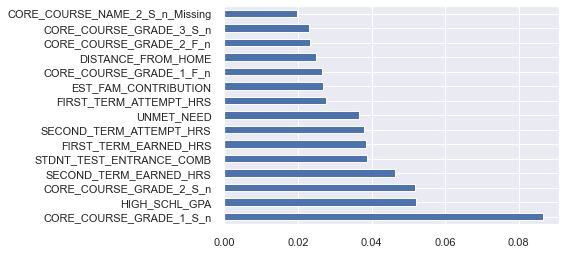

In [240]:
imp_feat.sort_values(ascending=False).head(15).plot(kind='barh')

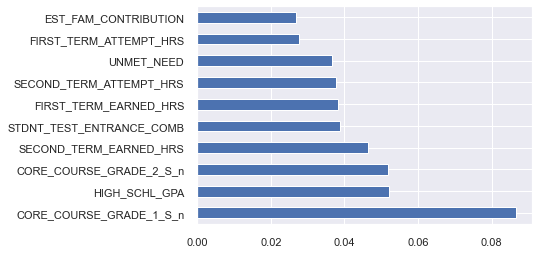

In [241]:
imp_feat.sort_values(ascending=False).head(10).plot(kind='barh')

In [246]:
from sklearn.model_selection import GridSearchCV

In [255]:
param_grid = { 
    'n_estimators': [240, 251],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,4,5,6,7,8,9]
}

CV_rfc = GridSearchCV(estimator=modelrf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)
print (CV_rfc.best_params_)

{'max_depth': 9, 'max_features': 'auto', 'n_estimators': 240}


In [256]:
modelrf=RandomForestClassifier(n_estimators=251,max_features='auto',max_depth=9,oob_score=True,n_jobs=-1,random_state=400)

In [257]:
modelrf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=251,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [258]:
modelrf.oob_score_

0.8301470588235295

In [259]:
modelrf.feature_importances_

array([9.57152472e-03, 2.47330929e-02, 4.14401388e-02, 2.09725851e-02,
       3.51886883e-02, 4.29743120e-02, 4.93703597e-02, 2.57166562e-02,
       2.09010741e-02, 1.46917217e-02, 1.46524006e-01, 8.44666820e-02,
       2.76691304e-02, 2.91755984e-02, 4.87526767e-05, 2.00684245e-02,
       3.03443265e-02, 7.18236248e-03, 7.49735243e-03, 5.39676852e-03,
       5.38698205e-03, 6.67849215e-03, 6.78506694e-03, 6.66767731e-03,
       5.84012253e-03, 3.98550536e-03, 5.10660002e-03, 3.03851720e-03,
       7.02774811e-03, 6.21374850e-03, 2.48738308e-03, 6.19879072e-03,
       1.87504774e-03, 4.24329437e-04, 8.07862366e-04, 4.77277439e-04,
       8.36982276e-03, 5.95126692e-03, 4.35854877e-03, 4.26856977e-03,
       2.51790236e-03, 2.74729897e-03, 4.30525299e-03, 6.53508878e-03,
       9.31575510e-03, 3.21492147e-03, 3.18684727e-03, 3.87426328e-03,
       2.29300887e-03, 4.16761026e-03, 2.84119453e-03, 1.55054367e-03,
       6.61180267e-03, 2.61823245e-03, 3.46479511e-03, 5.08191754e-03,
      

In [260]:
imp_feat=pd.Series(modelrf.feature_importances_,index=X.columns.tolist())

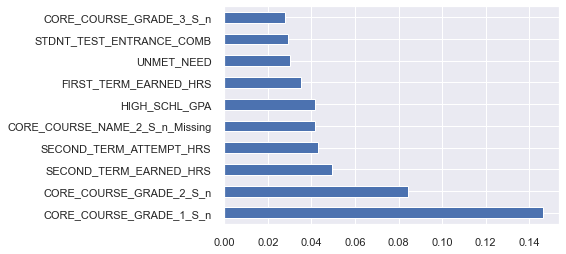

In [261]:
imp_feat.sort_values(ascending=False).head(10).plot(kind='barh')

In [202]:
#These are  the key factors affecting the student attrition

In [205]:
from pandas import read_csv, DataFrame
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from os import system


In [225]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8279411764705882

In [209]:
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

# Export resulting tree to DOT source code string
dot_data = export_graphviz(dtree,
                           feature_names=X.columns,
                           out_file=None,
                           filled=True,
                           rounded=True)

In [211]:
pydot_graph = pydotplus.graph_from_dot_data(dot_data)


In [227]:
>>> import graphviz 
>>> dot_data = tree.export_graphviz(clf, out_file=None) 
>>> graph = graphviz.Source(dot_data) 
>>> graph.render("dtfile") 

'dtfile.pdf'

In [262]:
# decision tree gave low accuracy than random forest

In [ ]:
##Using smote 

In [293]:
#data2.columns

In [266]:
dfx=data2.drop("Target",axis=1)
dfy=data2["Target"]

In [276]:
os = SMOTE(random_state=0)
columns = dfx.columns
os_X_train,os_y_train = os.fit_sample(dfx, dfy)
os_data_X = pd.DataFrame(data=os_X_train,columns=columns)
os_data_y = pd.DataFrame(data=os_y_train,columns=['Target'])

In [277]:
from imblearn.over_sampling import SMOTE

In [278]:
os_y_train.value_counts()

1    2677
0    2677
Name: Target, dtype: int64

In [279]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(os_data_X,os_data_y,test_size=0.20,random_state=400)

In [280]:
os_data_X.shape
#os_data_y

(5354, 89)

In [281]:
os_data_y.shape

(5354, 1)

In [282]:
modelsmot=RandomForestClassifier(n_estimators=251,max_features='auto',max_depth=9,oob_score=True,n_jobs=-1,random_state=400)
modelsmot.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=251,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [284]:
modelsmot.oob_score_

0.8757879990660752

In [290]:
from sklearn.model_selection import GridSearchCV

In [294]:
param_grid = { 
    'n_estimators': [240,242,244,246,248,250,251],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,4,5,6,7]
}

CV_rfs = GridSearchCV(estimator=modelsmot, param_grid=param_grid, cv= 5)
CV_rfs.fit(X_train,y_train)
print (CV_rfs.best_params_)

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 251}


In [295]:
modelsmot=RandomForestClassifier(n_estimators=251,max_features='auto',max_depth=7,oob_score=True,n_jobs=-1,random_state=400)
modelsmot.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=251,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [296]:
modelsmot.feature_importances_

array([4.49164736e-03, 1.21352107e-02, 1.61091729e-02, 7.07395433e-03,
       1.16616456e-02, 3.52163670e-02, 3.58669682e-02, 2.14197027e-02,
       3.22308741e-02, 1.88020372e-02, 1.23854871e-01, 1.07832124e-01,
       4.61213629e-02, 2.02124327e-02, 2.29209449e-04, 1.93211440e-02,
       2.95371466e-02, 1.94010699e-02, 2.97300885e-02, 2.08262738e-03,
       6.45985344e-03, 1.54982517e-02, 6.37720702e-03, 1.70242485e-02,
       1.25701504e-02, 1.03071287e-03, 5.11652062e-03, 3.39824959e-03,
       1.73203492e-02, 1.35538047e-02, 5.35850918e-04, 4.54534988e-03,
       1.67523770e-03, 3.94275163e-05, 3.50464497e-04, 4.54183964e-05,
       5.84506132e-03, 3.26308575e-02, 4.20686070e-03, 5.12228159e-03,
       2.46337175e-03, 1.23178824e-03, 8.62602530e-04, 3.15895062e-03,
       1.33149941e-02, 2.00871140e-03, 1.38580250e-03, 3.57572029e-03,
       1.69292191e-03, 1.32320158e-03, 1.90746203e-03, 8.97691095e-04,
       2.28029728e-03, 1.34216232e-03, 5.54036749e-03, 5.81180084e-03,
      

In [297]:
imp_feat=pd.Series(modelsmot.feature_importances_,index=X.columns.tolist())

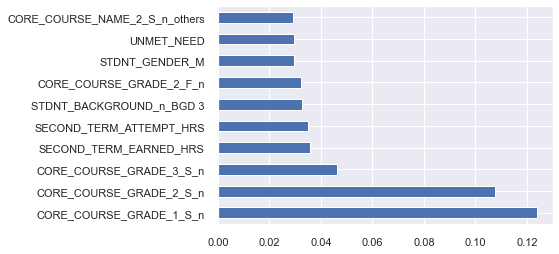

In [298]:
imp_feat.sort_values(ascending=False).head(10).plot(kind='barh')